## Machine Learning Problem

It is a binary classification problem,for a given text we need to predict whether the news is fake or not.

#### Data Overview

Source: https://www.kaggle.com/akshayaki/fakenews

- Data is in file News.csv
- Size of News.csv is 116.86 MB 
- News.csv contains 6 columns: Unnamed index column, title, text, subject, date, labels
- Number of rows: 44898

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Data and Basic Stats

In [ ]:
# Libraries

import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt 
% matplotlib inline

In [ ]:
# reading csv file
data = pd.read_csv("/content/drive/MyDrive/Fake News/News.csv")

data.head()

,Unnamed: 0,title,text,subject,date,Labels
0,0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,politics,"Sep 22, 2016",Fake
1,1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Government News,"Jun 26, 2015",Fake
2,2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",Fake
3,3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,left-news,"Nov 25, 2015",Fake
4,4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,politics,"Dec 21, 2016",Fake


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Fake News/pickels/test_data.csv")

test.to_csv('/content/drive/MyDrive/Fake News/pickels/test_data.csv.gz', compression='gzip')

In [ ]:
# Checking data
print('Total number of rows : ',data.shape[0])
print('Total number of features : ',data.shape[1])


Total number of rows :  44898
Total number of features :  6


In [ ]:
#Overall feature info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   title       44898 non-null  object
 2   text        44898 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   Labels      44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
# checking  all the columns name
data.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'Labels'], dtype='object')

In [ ]:
print(sum(data.duplicated('Unnamed: 0')))

0


In [ ]:
# Renaming Unnamed column to Id
data.rename(columns={"Unnamed: 0": "id"}, inplace=True)

In [ ]:
# Shuffling data as seen most of the labels are fake at starting so it may cause some problem when we split our data

data = shuffle(data)
data = data.reset_index(drop = True)

In [ ]:
data.head(10)

,id,title,text,subject,date,Labels
0,43691,NOTHING NEW: ‘Fake’ & Weaponized News Has Long...,In response to the establishment media s cont...,Middle-east,"February 21, 2017",Fake
1,39207,ABC News Suspend Anchor Brian Ross Over Fake N...,After 18 months of rampant speculation over Tr...,Middle-east,"December 5, 2017",Fake
2,11119,PAUL RYAN “BETRAYED” A Wealthy Businessman Who...,This is great! More citizens need to take it t...,politics,"Mar 28, 2016",Fake
3,3243,Senate may vote on revised healthcare bill nex...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,"July 11, 2017",True
4,6143,Strong defense relationship with Britain to co...,WASHINGTON (Reuters) - The Pentagon is confide...,politicsNews,"June 24, 2016",True
5,26121,Indonesia court rejects petition to bar consen...,JAKARTA (Reuters) - Indonesia s constitutional...,worldnews,"December 14, 2017",True
6,16745,Donald Trump Attacks Ted Cruz With The Single...,Republican Presidential front runner Donald Tr...,News,"February 12, 2016",Fake
7,2133,DISGRACEFUL: US Air Force Can No Longer Afford...,We can t afford to give our US Veterans a prop...,left-news,"Jan 1, 2016",Fake
8,34705,Palestinian President Abbas won't meet Pence i...,CAIRO (Reuters) - Palestinian President Mahmou...,worldnews,"December 9, 2017",True
9,15041,NICOLE KIDMAN BREAKS RANKS With Hollywood Left...,She s travelling the world to promote her new ...,left-news,"Jan 12, 2017",Fake


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.25, random_state=0)

In [ ]:
test['Labels'].value_counts()

Fake    5901
True    5324
Name: Labels, dtype: int64

In [ ]:
test.to_csv('/content/drive/MyDrive/Fake News/pickels/test_data.csv.gz', compression='gzip')
train.to_csv('/content/drive/MyDrive/Fake News/pickels/train_data.csv.gz', compression='gzip')

## Basic Data Exploration

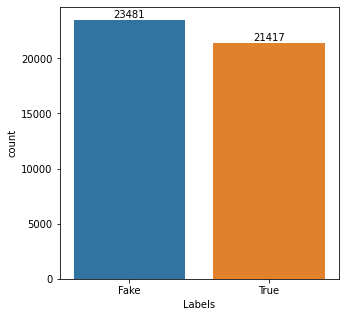

In [ ]:
# No. of fake news and true news

plt.figure(figsize=(5,5))
sub = sns.countplot(x =data["Labels"], data = data)

for p in sub.patches:
        sub.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

### Observations:
- No. of Fake news is more than the True news
- As seen their is small difference between fake and true labels so, the dataset is balanced

In [ ]:
#checking count between fake news and true news

data.groupby("Labels")['text'].count()

Labels
Fake    23481
True    21417
Name: text, dtype: int64

In [ ]:
data['subject'].describe()

count            44898
unique               8
top       politicsNews
freq             11272
Name: subject, dtype: object

In [ ]:
# based on subject counting total number of news for each

print(data['subject'].value_counts())


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


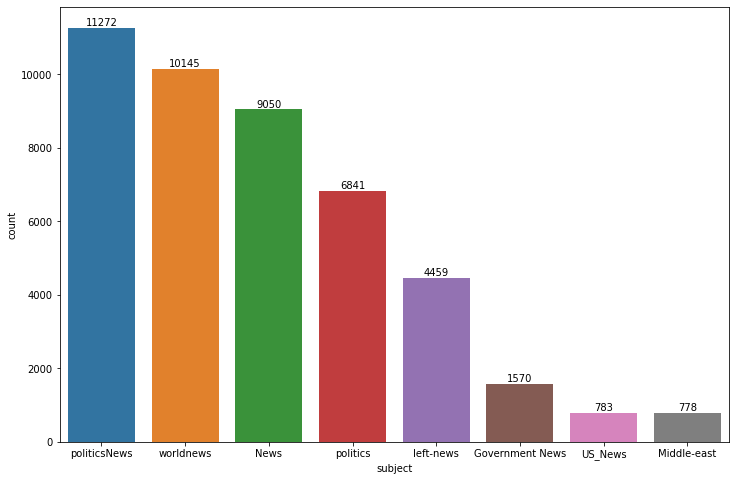

In [ ]:
# visualizing news count based on subject
plt.figure(figsize=(12,8))

sub= sns.countplot(x=data["subject"], data=data, order = data["subject"].value_counts().index)
for p in sub.patches:
        sub.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

## Observation
- most of the news is from politicalNews and worldnews.
- least number of news is from US_News and Middle-east

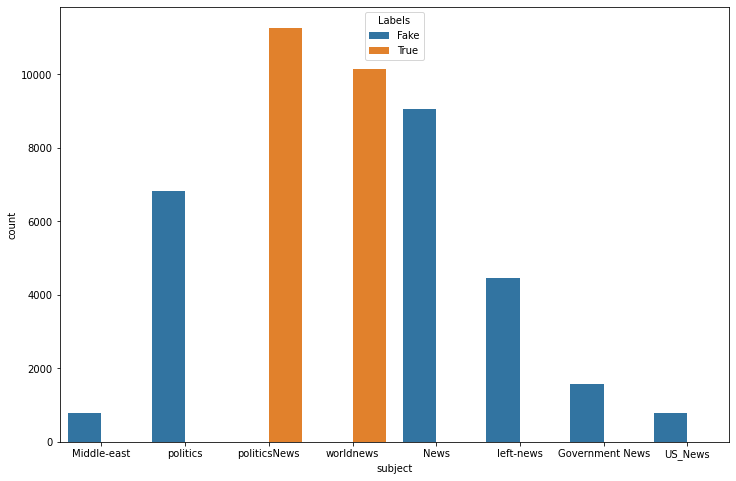

In [ ]:
# Checking True and Fake news based on each subject in a single plot


# sns.catplot(x="subject", hue="Labels", kind="count",
#             palette="tab10",
#             data=data,height=8.27, aspect=11.7/8.27)
plt.figure(figsize=(12,8))
sns.countplot(x=data["subject"], hue =data["Labels"], data = data)


## Observation
- It can be seen that all the news from politicsNews and worldnews are true /real means those are authentic source of news
- All the news from News,politics,left-news, middle-east, Government News, US_News are Fake means not a authentic source of news

In [ ]:
#Fake news count for each subject
print("Fake News Count based on Subject :\n\n",data[data["Labels"] == "Fake"]['subject'].value_counts())

Fake News Count based on Subject :

 News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


In [ ]:
#True news count for each subject
print("True News Count based on Subject :\n\n",data[data["Labels"] == "True"]['subject'].value_counts())

True News Count based on Subject :

 politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


# **Distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News length distribution')

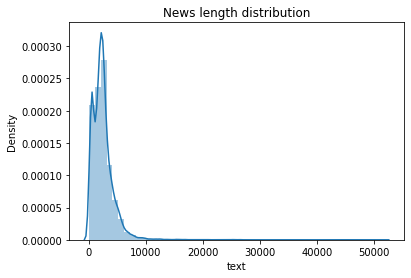

In [ ]:
sns.distplot(data['text'].str.len()).set_title('News length distribution')

## **Observation**
- right skewed
- most of the news text length is betweeen 0 to 10,000
- only few of the news text length is above 10,000 

## Wordcloud Visuals

#### Word Cloud for True words

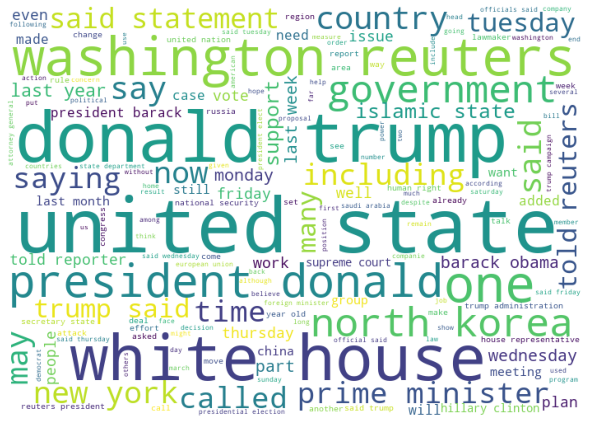

In [ ]:
True_words =''

stopwords = set(STOPWORDS)

for sent in data[data["Labels"]=="True"].text:
    words = sent.split()
    for w in range(len(words)):
        words[w] = words[w].lower()
    
    True_words+=" ".join(words)+" "



wordcloud = WordCloud(width = 700, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(True_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Word Cloud for Fake words

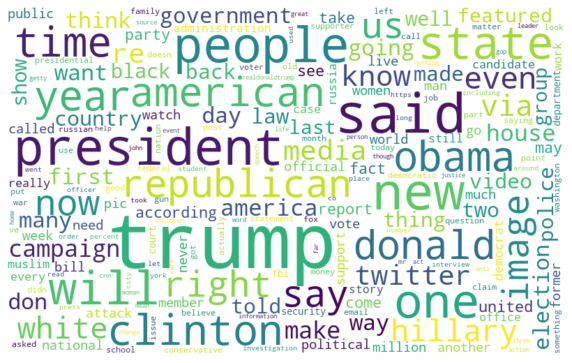

In [ ]:
Fake_words =''

stopwords = set(STOPWORDS)

for sent in data[data["Labels"]=="Fake"].text:
    words = sent.split()
    for w in range(len(words)):
        words[w] = words[w].lower()
    
    Fake_words+=" ".join(words)+" "


wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          stopwords = stopwords, 
                          background_color ='white', 
                          collocations = False).generate(Fake_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Cleaning and Text Preprocessing

In [ ]:
data['total'] = data['title'] +' '+ data['text']

In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.drop(["text"],axis=1,inplace=True)
data.drop(["date"],axis=1,inplace=True)
data.head()

,id,subject,Labels,total
0,43691,Middle-east,Fake,NOTHING NEW: ‘Fake’ & Weaponized News Has Long...
1,39207,Middle-east,Fake,ABC News Suspend Anchor Brian Ross Over Fake N...
2,11119,politics,Fake,PAUL RYAN “BETRAYED” A Wealthy Businessman Who...
3,3243,politicsNews,True,Senate may vote on revised healthcare bill nex...
4,6143,politicsNews,True,Strong defense relationship with Britain to co...


In [ ]:
#checking if their is any missing value or null values

print('missing or null values in any features:\n',data.isnull().sum())

missing or null values in any features:
 id         0
subject    0
Labels     0
total      0
dtype: int64


In [ ]:
# checking imputed value
total_missing_values = len(data[data['total'] == ' '].index)
total_missing_values

0

In [ ]:
# Checking for duplicates
print(sum(data.duplicated(subset={'id','total','subject'}, keep='first' )))

0


In [ ]:
data['total'].values[11]

' Huckabee FURIOUS After He’s Forced To Pay $25k For Playing ‘Eye Of The Tiger’ At Kim Davis Rally When Kim Davis made her way  back on the street  after doing her time and taking her chances, then-presidential candidate Mike Huckabee triumphantly played Survivor s  Eye of the Tiger  to welcome the bigoted Kentucky county clerk back to the civilization whose laws she refused to respect. Davis was jailed briefly after refusing to issue marriage licenses to gay couples in violation of the Supreme Court s ruling that same-sex marriage is legal nationwide   something that angered the band s frontman, Frankie Sullivan. NO! We did not grant Kim Davis any rights to use  My Tune -The Eye Of The Tiger.  I would not grant her the rights to use Charmin!  a furious Sullivan wrote on Twitter following Davis and Huckabee s stunt.  See Ya really SoooooooonnnnnN!!! The Rude Music, which is owned by Sullivan, quickly sued Huckabee for copyright infringement, leading Huckabee s campaign to boldly declar

In [ ]:
sentence = data['total'].values[11]


In [ ]:
#remove urls from text

sentence = re.sub(r"http\S+", "", sentence)
sentence = re.sub(r"\S+(.com)\S+", "", sentence)
print(sentence)

 Huckabee FURIOUS After He’s Forced To Pay $25k For Playing ‘Eye Of The Tiger’ At Kim Davis Rally When Kim Davis made her way  back on the street  after doing her time and taking her chances, then-presidential candidate Mike Huckabee triumphantly played Survivor s  Eye of the Tiger  to  the bigoted Kentucky county clerk back to the civilization whose laws she refused to respect. Davis was jailed briefly after refusing to issue marriage licenses to gay couples in violation of the Supreme Court s ruling that same-sex marriage is legal nationwide   something that angered the band s frontman, Frankie Sullivan. NO! We did not grant Kim Davis any rights to use  My Tune -The Eye Of The Tiger.  I would not grant her the rights to use Charmin!  a furious Sullivan wrote on Twitter following Davis and Huckabee s stunt.  See Ya really SoooooooonnnnnN!!! The Rude Music, which is owned by Sullivan, quickly sued Huckabee for copyright infringement, leading Huckabee s campaign to boldly declare they w

In [ ]:
import re

def decontracted(sentence):
    # specific
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence


In [ ]:
sentence = decontracted(sentence)
print(sentence)

 Huckabee FURIOUS After He’s Forced To Pay $25k For Playing ‘Eye Of The Tiger’ At Kim Davis Rally When Kim Davis made her way  back on the street  after doing her time and taking her chances, then-presidential candidate Mike Huckabee triumphantly played Survivor s  Eye of the Tiger  to  the bigoted Kentucky county clerk back to the civilization whose laws she refused to respect. Davis was jailed briefly after refusing to issue marriage licenses to gay couples in violation of the Supreme Court s ruling that same-sex marriage is legal nationwide   something that angered the band s frontman, Frankie Sullivan. NO! We did not grant Kim Davis any rights to use  My Tune -The Eye Of The Tiger.  I would not grant her the rights to use Charmin!  a furious Sullivan wrote on Twitter following Davis and Huckabee s stunt.  See Ya really SoooooooonnnnnN!!! The Rude Music, which is owned by Sullivan, quickly sued Huckabee for copyright infringement, leading Huckabee s campaign to boldly declare they w

In [ ]:
#remove special character and other puntuations

sentence = re.sub(r"[^\w\s]", "", sentence)
print(sentence)

 Huckabee FURIOUS After Hes Forced To Pay 25k For Playing Eye Of The Tiger At Kim Davis Rally When Kim Davis made her way  back on the street  after doing her time and taking her chances thenpresidential candidate Mike Huckabee triumphantly played Survivor s  Eye of the Tiger  to  the bigoted Kentucky county clerk back to the civilization whose laws she refused to respect Davis was jailed briefly after refusing to issue marriage licenses to gay couples in violation of the Supreme Court s ruling that samesex marriage is legal nationwide   something that angered the band s frontman Frankie Sullivan NO We did not grant Kim Davis any rights to use  My Tune The Eye Of The Tiger  I would not grant her the rights to use Charmin  a furious Sullivan wrote on Twitter following Davis and Huckabee s stunt  See Ya really SoooooooonnnnnN The Rude Music which is owned by Sullivan quickly sued Huckabee for copyright infringement leading Huckabee s campaign to boldly declare they would not be  bullied 

In [ ]:
# remove numbers in text

sentence = re.sub("\S*\d\S*", "", sentence).strip()
print(sentence)

Huckabee FURIOUS After Hes Forced To Pay  For Playing Eye Of The Tiger At Kim Davis Rally When Kim Davis made her way  back on the street  after doing her time and taking her chances thenpresidential candidate Mike Huckabee triumphantly played Survivor s  Eye of the Tiger  to  the bigoted Kentucky county clerk back to the civilization whose laws she refused to respect Davis was jailed briefly after refusing to issue marriage licenses to gay couples in violation of the Supreme Court s ruling that samesex marriage is legal nationwide   something that angered the band s frontman Frankie Sullivan NO We did not grant Kim Davis any rights to use  My Tune The Eye Of The Tiger  I would not grant her the rights to use Charmin  a furious Sullivan wrote on Twitter following Davis and Huckabee s stunt  See Ya really SoooooooonnnnnN The Rude Music which is owned by Sullivan quickly sued Huckabee for copyright infringement leading Huckabee s campaign to boldly declare they would not be  bullied  by 

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')


words = nltk.word_tokenize(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stemming

# from nltk.stem.snowball import SnowballStemmer

# snow_stemmer = SnowballStemmer('english')


# stem_result = [snow_stemmer.stem(w) for w in words if len(w)>2]
# # stem_words = ' '.join(stem_result)

    
# stem_result

In [ ]:
# Lemmatization
nltk.download('wordnet')
lemmatize_word = [WordNetLemmatizer().lemmatize(w) for w in words if len(w)>2]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### **Combining all above preprocessing technique**

In [ ]:
# combining all the above text preprocessing

from tqdm import tqdm



for index, row in tqdm(data.iterrows(),total=data.shape[0]):
        sent = row['total']
        sent = re.sub(r"http\S+", "", sent)            # removing urls
        sent = re.sub(r"\S+(.com)\S*", "", sent)       # removing url without http
        sent = decontracted(sent)                      # decontracting words
        sent = re.sub(r"[^\w\s]", "", sent)           # special characters or puntuations
        sent = re.sub("\S*\d\S*", "", sent).strip()   # removing numbers 
        sent = nltk.word_tokenize(sent)               # tokenizing
        words = [word.lower() for word in sent if word.lower() not in stopwords.words('english')]   # removing stopwords
        lemmatize_word = [WordNetLemmatizer().lemmatize(w) for w in words if len(w)>2]     # lemmatization
        filtered_data = ' '.join(lemmatize_word)
        data.loc[index,'total'] = filtered_data
        

100%|██████████| 44898/44898 [33:46<00:00, 22.16it/s]


In [ ]:
data.head()

,id,subject,Labels,total
0,43691,Middle-east,Fake,nothing new fake weaponized news long haunted ...
1,39207,Middle-east,Fake,abc news suspend anchor brian ross fake news r...
2,11119,politics,Fake,paul ryan betrayed wealthy businessman running...
3,3243,politicsNews,True,senate may vote revised healthcare bill next w...
4,6143,politicsNews,True,strong defense relationship britain continue p...


### **Storing to pickel file**

In [ ]:
data.to_pickle('/content/drive/MyDrive/Fake News/pickels/44k_news')

### **Reading data from pickel file**

In [ ]:
data = pd.read_pickle("/content/drive/MyDrive/Fake News/pickels/44k_news")

In [ ]:
#checking data
data.head()

,id,subject,Labels,total
0,43691,Middle-east,Fake,nothing new fake weaponized news long haunted ...
1,39207,Middle-east,Fake,abc news suspend anchor brian ross fake news r...
2,11119,politics,Fake,paul ryan betrayed wealthy businessman running...
3,3243,politicsNews,True,senate may vote revised healthcare bill next w...
4,6143,politicsNews,True,strong defense relationship britain continue p...


### **Word Frequency**

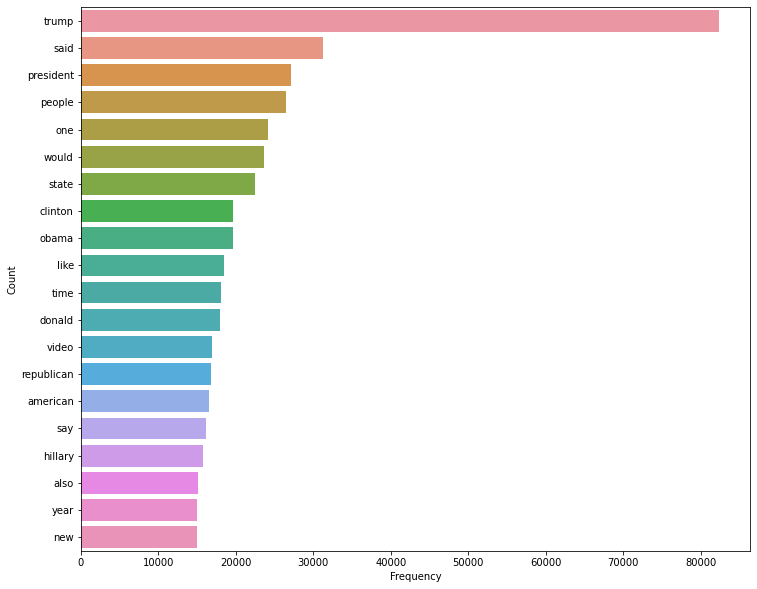

In [ ]:
#Fake news words count
dict = {}
for sent in data[data["Labels"]=="Fake"].total:
    words = sent.split()
    for w in words:
      dict[w] = dict.get(w, 0) + 1

word_frequency = pd.DataFrame({"Word": list(dict.keys()),
                                   "Frequency": list(dict.values())})
word_frequency = word_frequency.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(12,10))
ax = sns.barplot(data = word_frequency, x = "Frequency", y = "Word")
ax.set(ylabel = "Count")
plt.xticks(rotation='horizontal')
plt.show()

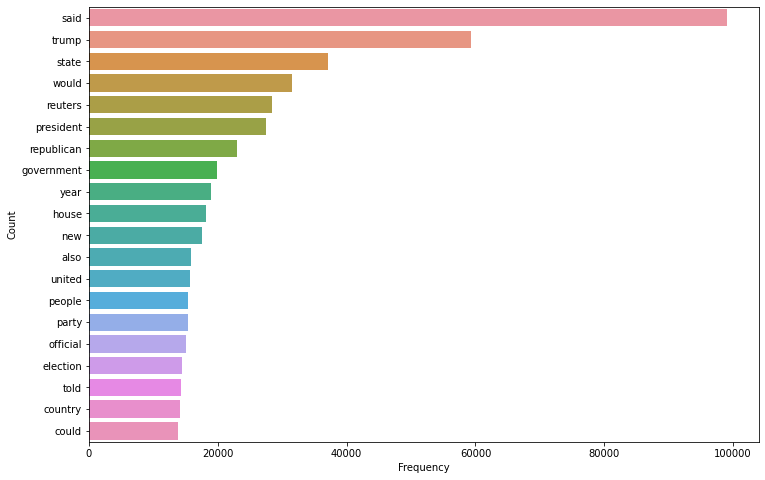

In [ ]:
#True news words count
dict = {}
for sent in data[data["Labels"]=="True"].total:
    words = sent.split()
    for w in words:
      dict[w] = dict.get(w, 0) + 1

word_frequency = pd.DataFrame({"Word": list(dict.keys()),
                                   "Frequency": list(dict.values())})
word_frequency = word_frequency.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word_frequency, x = "Frequency", y = "Word")
ax.set(ylabel = "Count")
plt.xticks(rotation='horizontal')
plt.show()



### **Converting labels into binary numerical form**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(data['Labels'])


data['Labels'] = labels
#Fake as 0
#True as 1

In [ ]:
data.head()

,id,subject,Labels,total
0,43691,Middle-east,0,nothing new fake weaponized news long haunted ...
1,39207,Middle-east,0,abc news suspend anchor brian ross fake news r...
2,11119,politics,0,paul ryan betrayed wealthy businessman running...
3,3243,politicsNews,1,senate may vote revised healthcare bill next w...
4,6143,politicsNews,1,strong defense relationship britain continue p...


## Split the data in train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.total, data.Labels, test_size=0.25, random_state=0)

In [ ]:
y_test.value_counts()

0    5901
1    5324
Name: Labels, dtype: int64

## **Feature Extraction**

**Countvectorizer**

In [ ]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=10, max_features=1000)

#Train
X_train_count_vec = text_vectorizer.fit_transform(X_train).toarray()
print("Train count vectorizer: ",X_train_count_vec.shape) 


#Test
X_test_count_vec=text_vectorizer.transform(X_test).toarray()
print("Test count vectorizer: ",X_test_count_vec.shape) 



Train count vectorizer:  (33673, 1000)
Test count vectorizer:  (11225, 1000)


**TfidfVectorizer**

In [ ]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range = (1,3), min_df=10, norm ='l2', max_features=1000)

#train
X_train_tfidf_vec = tfidf_vec.fit_transform(X_train).toarray()
print("Train Tfidf vectorizer: ",X_train_tfidf_vec.shape) 


#test
X_test_tfidf_vec = tfidf_vec.transform(X_test).toarray()
print("Test Tfidf vectorizer: ",X_test_tfidf_vec.shape) 


Train Tfidf vectorizer:  (33673, 1000)
Test Tfidf vectorizer:  (11225, 1000)


### **Doc2Vec**

In [ ]:
# Doc2Vec
from tqdm import tqdm
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
import numpy as np

In [ ]:
def sentences_with_tags(document, tag_type):
  tagging_each= []

  for index, list_of_sentence in enumerate(document):
    tagging_each.append(TaggedDocument(list_of_sentence.split(),[tag_type + '_' + str(index)]))
  
  return tagging_each

In [ ]:
#Train
X_train = sentences_with_tags(X_train, 'Train')

#Test
X_test = sentences_with_tags(X_test, 'Test')

#Combining both train and test to find vectors and then splitting them using their tags
combined_text_data = X_train + X_test

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, min_count=2)
model_dbow.build_vocab([words for words in tqdm(combined_text_data)])

100%|██████████| 44898/44898 [00:00<00:00, 3363443.91it/s]


In [ ]:
#train model
model_dbow.train(utils.shuffle([w for w in tqdm(combined_text_data)]), total_examples = len(combined_text_data), epochs = 30)

100%|██████████| 44898/44898 [00:00<00:00, 3517424.28it/s]


In [ ]:
# converting to vector form
def dbow_vectors(model, doc_size, vec_size , vec_type):
  vec = np.zeros((doc_size, vec_size))
  for i in range(0, doc_size):
    vec[i] = model.docvecs[vec_type + '_' + str(i)]
  return vec


In [ ]:
#Train
X_train_dbow_vec = dbow_vectors(model_dbow, len(X_train), 300, 'Train')
print(X_train_dbow_vec.shape)

#Test
X_test_dbow_vec = dbow_vectors(model_dbow, len(X_test), 300, 'Test')
print(X_test_dbow_vec.shape)

(33673, 300)
(11225, 300)


## **ML models**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, log_loss, classification_report

In [5]:
data = pd.read_pickle("/content/drive/MyDrive/Fake News/pickels/44k_news")

In [6]:
data.head()

,id,subject,Labels,total
0,43691,Middle-east,Fake,nothing new fake weaponized news long haunted ...
1,39207,Middle-east,Fake,abc news suspend anchor brian ross fake news r...
2,11119,politics,Fake,paul ryan betrayed wealthy businessman running...
3,3243,politicsNews,True,senate may vote revised healthcare bill next w...
4,6143,politicsNews,True,strong defense relationship britain continue p...


In [7]:
#converting labels from text to numerical form
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(data['Labels'])


data['Labels'] = labels
#Fake as 0
#True as 1

In [8]:
data.head()

,id,subject,Labels,total
0,43691,Middle-east,0,nothing new fake weaponized news long haunted ...
1,39207,Middle-east,0,abc news suspend anchor brian ross fake news r...
2,11119,politics,0,paul ryan betrayed wealthy businessman running...
3,3243,politicsNews,1,senate may vote revised healthcare bill next w...
4,6143,politicsNews,1,strong defense relationship britain continue p...


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.total, data.Labels, test_size=0.25, random_state=0)

In [10]:
X_train.head()

13637    fix road california governor brown tell lawmak...
42421    trump koch brother odds trumpcare vote washing...
37916    trump attacked bernie series tweet tuesday ber...
3321     priority vet lay dying waiting medical careoba...
2345     karma hollywood liberal bashed trump guess wha...
Name: total, dtype: object

In [11]:
y_test.value_counts()

0    5901
1    5324
Name: Labels, dtype: int64

In [20]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=10, max_features=1000)
#this one is used in production
# text_vectorizer = CountVectorizer(max_features=3000) 

#Train
X_train_count_vec = text_vectorizer.fit_transform(X_train).toarray()
print("Train count vectorizer: ",X_train_count_vec.shape) 


#Test
X_test_count_vec=text_vectorizer.transform(X_test).toarray()
print("Test count vectorizer: ",X_test_count_vec.shape) 

Train count vectorizer:  (33673, 1000)
Test count vectorizer:  (11225, 1000)


In [21]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range = (1,3), min_df=10, norm ='l2', max_features=1000)
# tfidf_vec = TfidfVectorizer(max_features=3000)

#train
X_train_tfidf_vec = tfidf_vec.fit_transform(X_train).toarray()
print("Train Tfidf vectorizer: ",X_train_tfidf_vec.shape) 

#test
X_test_tfidf_vec = tfidf_vec.transform(X_test).toarray()
print("Test Tfidf vectorizer: ",X_test_tfidf_vec.shape) 



Train Tfidf vectorizer:  (33673, 1000)
Test Tfidf vectorizer:  (11225, 1000)


In [ ]:
# Doc2Vec
from tqdm import tqdm
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
import numpy as np

def sentences_with_tags(document, tag_type):
  tagging_each= []

  for index, list_of_sentence in enumerate(document):
    tagging_each.append(TaggedDocument(list_of_sentence.split(),[tag_type + '_' + str(index)]))
  
  return tagging_each

#Train
X_train = sentences_with_tags(X_train, 'Train')

#Test
X_test = sentences_with_tags(X_test, 'Test')

#Combining both train and test to find vectors and then splitting them using their tags
combined_text_data = X_train + X_test

model_dbow = Doc2Vec(dm=0, vector_size=300, min_count=2)
model_dbow.build_vocab([words for words in tqdm(combined_text_data)])



100%|██████████| 44898/44898 [00:00<00:00, 2540072.04it/s]


In [ ]:
#train model
model_dbow.train(utils.shuffle([w for w in tqdm(combined_text_data)]), total_examples = len(combined_text_data), epochs = 30)

100%|██████████| 44898/44898 [00:00<00:00, 2089635.49it/s]


In [ ]:
#save doc2vec train model 
import pickle
filename = '/content/drive/MyDrive/Fake News/pickels/Doc2vec_Trained_Model.pkl'
pickle.dump(model_dbow, open(filename, 'wb' ))

In [ ]:
#load doc2vec model
model_dbow = pickle.load(open("/content/drive/MyDrive/Fake News/pickels/Doc2vec_Trained_Model.pkl", 'rb'))

In [ ]:
# converting to vector form
def dbow_vectors(model, doc_size, vec_size , vec_type):
  vec = np.zeros((doc_size, vec_size))
  for i in range(0, doc_size):
    vec[i] = model.docvecs[vec_type + '_' + str(i)]
  return vec
  
#Train
X_train_dbow_vec = dbow_vectors(model_dbow, len(X_train), 300, 'Train')
print(X_train_dbow_vec.shape)

#Test
X_test_dbow_vec = dbow_vectors(model_dbow, len(X_test), 300, 'Test')
print(X_test_dbow_vec.shape)

(33673, 300)
(11225, 300)


In [15]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):

    #confusion matrix
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    
    #Recall
    #divid each element of the confusion matrix with the sum of elements in that column
    A =(((C.T)/(C.sum(axis=1))).T)
    
    #Precision Matrix
    #divide each element of the confusion matrix with the sum of elements in that row
    B =(C/C.sum(axis=0))
    
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### Logestic regression without hyperparameter tuning

In [ ]:
def normal_logestic_regression(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  data = []
  
  log_reg = LogisticRegression(max_iter = 300)
  print(log_reg.get_params())
  log_reg.fit(x_train, Y_train)
  log_reg_prediction = log_reg.predict(x_test)
  Accuracy = accuracy_score(Y_test, log_reg_prediction)
  print('Accuracy: ', Accuracy)
  err=-cross_val_score(log_reg,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)

  print('\n')
  print(classification_report(Y_test, log_reg_prediction))

  pred = log_reg.predict_proba(x_train)
  pred_t = log_reg.predict_proba(x_test)
  print("*"*10,"LOG-LOSS","*"*10)

  
  print('log loss on train dataset : ', log_loss(Y_train, pred))
  print('log loss on test dataset : ', log_loss(Y_test, pred_t))

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)
  
  #plot confusion matrix
  plot_confusion_matrix(Y_test, log_reg_prediction)
  return data

********** BAG-OF-WORD **********
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 300, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9951893095768374
Error:  0.0939133638312231


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5901
           1       1.00      0.99      0.99      5324

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

********** LOG-LOSS **********
log loss on train dataset :  0.004040015985699276
log loss on test dataset :  0.02477110207224479


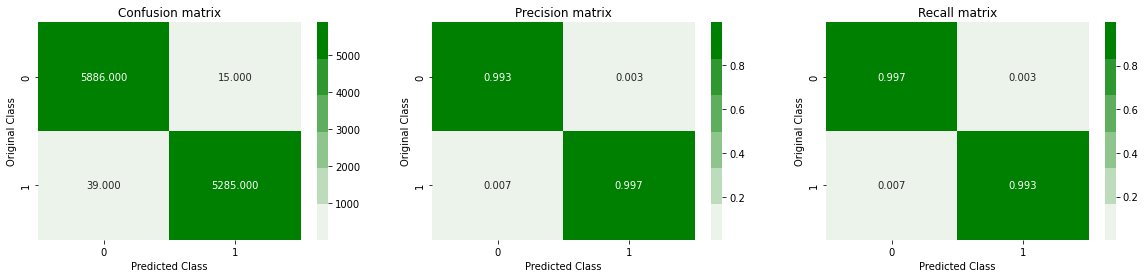




********** TF-IDF **********
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 300, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9852115812917595
Error:  0.14561220727244817


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5901
           1       0.98      0.99      0.98      5324

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

********** LOG-LOSS **********
log loss on train dataset :  0.05913967486331265
log loss on test dataset :  0.06701915450473629


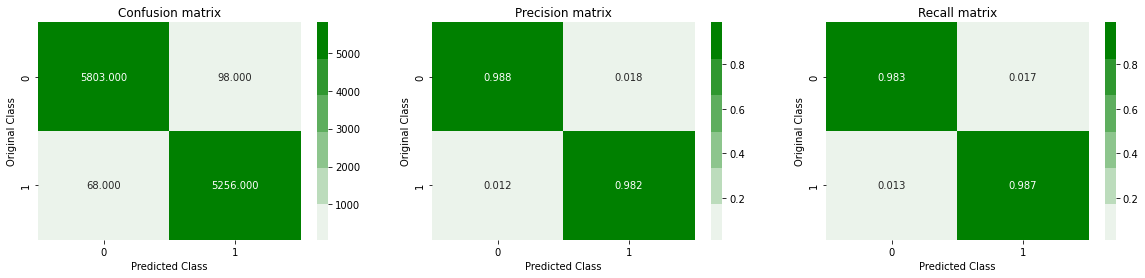




********** DOC2VEC **********
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 300, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.992694877505568
Error:  0.09899311023879291


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5901
           1       0.99      0.99      0.99      5324

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

********** LOG-LOSS **********
log loss on train dataset :  0.01830526593066219
log loss on test dataset :  0.02356581992459898


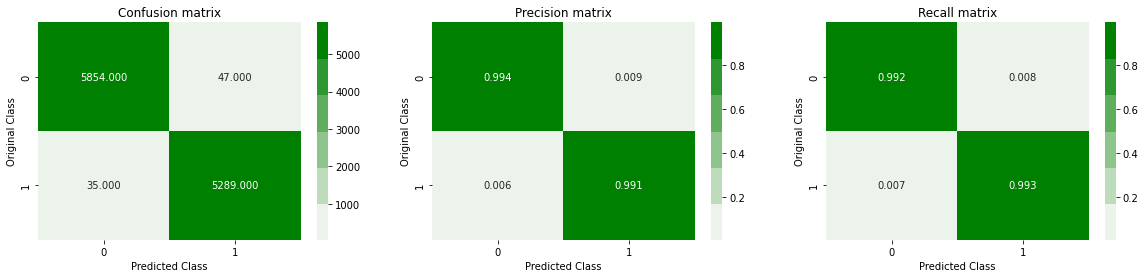

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = normal_logestic_regression(X_train_count_vec, y_train, X_test_count_vec, y_test,'Logestic Regression','BAG OF WORDS', 'No')
print("\n\n")

#For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = normal_logestic_regression(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Logestic Regression','TF-IDF','No')
print("\n\n")

#For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = normal_logestic_regression(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Logestic Regression','DOC2VEC','No')



In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df1 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = pd.DataFrame(df1,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
df1

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Logestic Regression,BAG OF WORDS,No,0.995189,0.093913
1,Logestic Regression,TF-IDF,No,0.985212,0.145612
2,Logestic Regression,DOC2VEC,No,0.992695,0.098993


### Logestic Regression with Hyperparameter tuning

In [ ]:
def bestparam_logestic_regression(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  # initialise all hyperparameter which is need to be regularize
  data = []
  hyperparam = {'C': [10 ** x for x in range(-5, 2)] }
  gridsearch = GridSearchCV(LogisticRegression(), hyperparam, cv = 3, verbose = 0,return_train_score=True)
  grid = gridsearch.fit(x_train, Y_train)

  #Getting best values of parameter 
  print('Best parameters')
  print("gridsearch: ",grid.best_params_)
  print('\n\n')

  # putting best parameter to our model
  log_reg = LogisticRegression(**grid.best_params_,max_iter= 300)
  log_reg.fit(x_train, Y_train)
  
  sig_cal = CalibratedClassifierCV(log_reg, method="sigmoid")
  sig_cal.fit(x_train, Y_train)
  
  predic_test = sig_cal.predict(x_test)
  Accuracy = accuracy_score(Y_test, predic_test)
  print('Accuracy: ', Accuracy)

  err=-cross_val_score(sig_cal,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)
  print('\n')
  
  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)

  test_scores = grid.cv_results_['mean_test_score']
  train_scores = grid.cv_results_['mean_train_score'] 

  #plot graph for train and test score
  plt.plot(test_scores,color='blue', marker='o',label='test')
  plt.plot(train_scores,color='red', marker='o',label='train')
  plt.legend(loc='best')
  plt.show()


  log_reg_predic_train = sig_cal.predict_proba(x_train)
  print("The train log loss is:",log_loss(Y_train, log_reg_predic_train, labels=log_reg.classes_, eps=1e-15))
  log_reg_predic_test = sig_cal.predict_proba(x_test)
  print("The test log loss is:",log_loss(Y_test, log_reg_predic_test, labels=log_reg.classes_, eps=1e-15))
  print('\n\n')
  print(classification_report(Y_test, predic_test))
  print('\n\n')
  predicted_y =np.argmax(log_reg_predic_test,axis=1)
  print("Total number of data points :", len(predicted_y))
  print('\n\n')
  
  #plot confusion matrix
  plot_confusion_matrix(Y_test, predic_test)
  print('\n\n')

  #plot roc curve
  from sklearn.metrics import roc_curve, auc
  fpr,tpr,ths = roc_curve(Y_test,predic_test)
  auc_sc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic with test data')
  plt.legend()
  plt.show()

  return data

********** BAG-OF-WORD **********


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameters
gridsearch:  {'C': 0.1}



Accuracy:  0.9939420935412027
Error:  0.08953961567126707




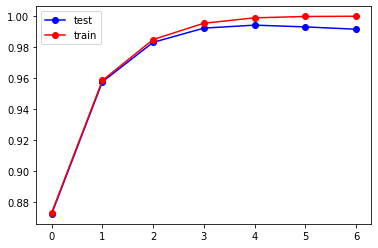

The train log loss is: 0.06367511690024655
The test log loss is: 0.07114572110363777



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5893
           1       0.99      1.00      0.99      5332

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225




Total number of data points : 11225





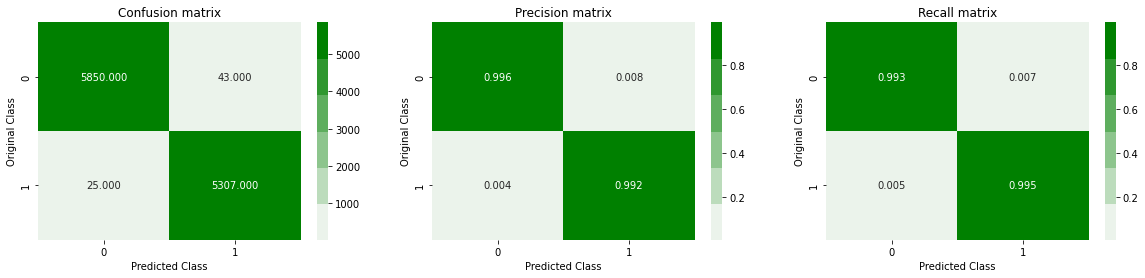

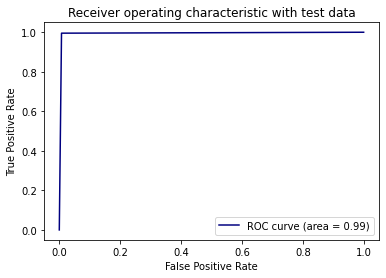

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = bestparam_logestic_regression(X_train_count_vec, y_train, X_test_count_vec, y_test,'Logestic Regression','BAG OF WORDS', 'Yes')
print("\n\n")



********** TF-IDF **********


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameters
gridsearch:  {'C': 10}



Accuracy:  0.9903786191536749
Error:  0.1182632793402163




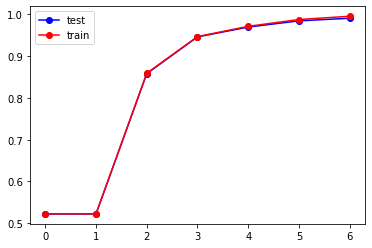

The train log loss is: 0.016746126758149744
The test log loss is: 0.029735838196539008



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5893
           1       0.99      0.99      0.99      5332

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225




Total number of data points : 11225





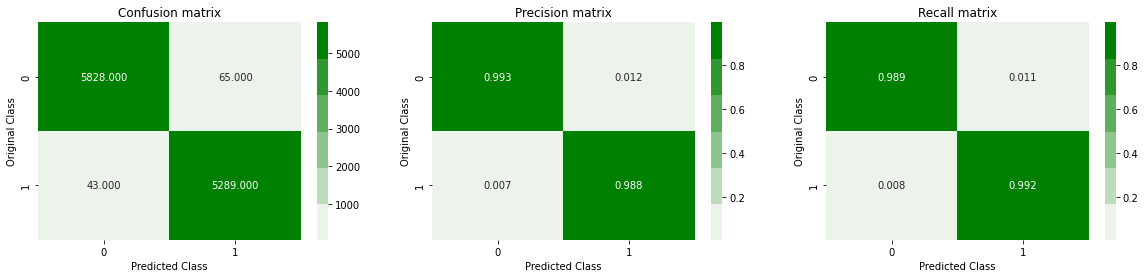

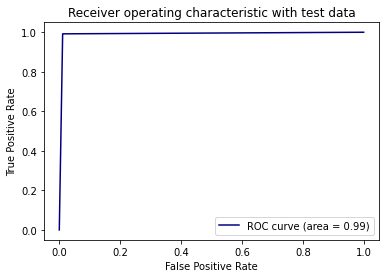

In [ ]:
# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = bestparam_logestic_regression(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Logestic Regression','TF-IDF','Yes')
print("\n\n")



********** DOC2VEC **********
Best parameters
gridsearch:  {'C': 0.1}



Accuracy:  0.9914476614699332
Error:  0.10425295392994251




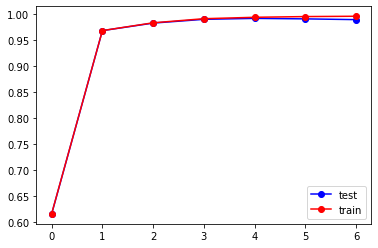

The train log loss is: 0.020030952082055634
The test log loss is: 0.026612126189055965



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5893
           1       0.99      0.99      0.99      5332

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225




Total number of data points : 11225





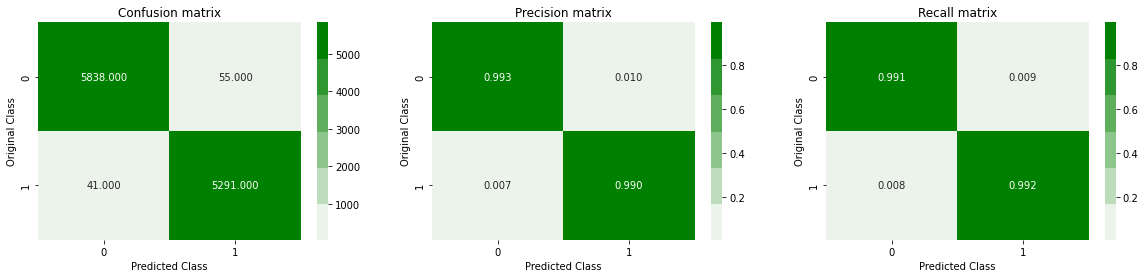

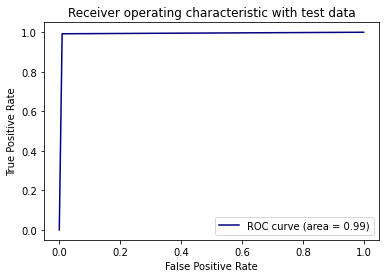

In [ ]:
# For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = bestparam_logestic_regression(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Logestic Regression','DOC2VEC','Yes')

In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df2 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df2, ignore_index = True)
df2

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Logestic Regression,BAG OF WORDS,Yes,0.993942,0.089540
1,Logestic Regression,TF-IDF,Yes,0.990379,0.118263
2,Logestic Regression,DOC2VEC,Yes,0.991448,0.104253


### **Naive Bayes**

In [ ]:
def gaussian_naive_bayes(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  data = []
  naive_bayes = GaussianNB()
  print(naive_bayes.get_params())
  naive_bayes.fit(x_train, Y_train)
  naive_bayes_prediction = naive_bayes.predict(x_test)
  Accuracy = accuracy_score(Y_test, naive_bayes_prediction)
  print('Accuracy: ', Accuracy)

  err=-cross_val_score(naive_bayes,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)

  print('\n')

  print(classification_report(Y_test, naive_bayes_prediction))

  pred = naive_bayes.predict_proba(x_train)
  pred_t = naive_bayes.predict_proba(x_test)
  print("*"*10,"LOG-LOSS","*"*10)
  print('log loss on train dataset : ', log_loss(Y_train, pred))
  print('log loss on test dataset : ', log_loss(Y_test, pred_t))

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)

  #plot confusion matrix
  plot_confusion_matrix(Y_test, naive_bayes_prediction)

  print('\n\n')

  # plot ROC curve
  from sklearn.metrics import roc_curve, auc
  fpr,tpr,ths = roc_curve(Y_test,naive_bayes_prediction)
  auc_sc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic with test data')
  plt.legend()
  plt.show()

  return data

********** BAG-OF-WORD **********
{'priors': None, 'var_smoothing': 1e-09}
Accuracy:  0.9020044543429844
Error:  0.2842539876980451


              precision    recall  f1-score   support

           0       0.95      0.86      0.90      5901
           1       0.86      0.95      0.90      5324

    accuracy                           0.90     11225
   macro avg       0.90      0.90      0.90     11225
weighted avg       0.91      0.90      0.90     11225

********** LOG-LOSS **********
log loss on train dataset :  2.701780361490401
log loss on test dataset :  2.837821273172497


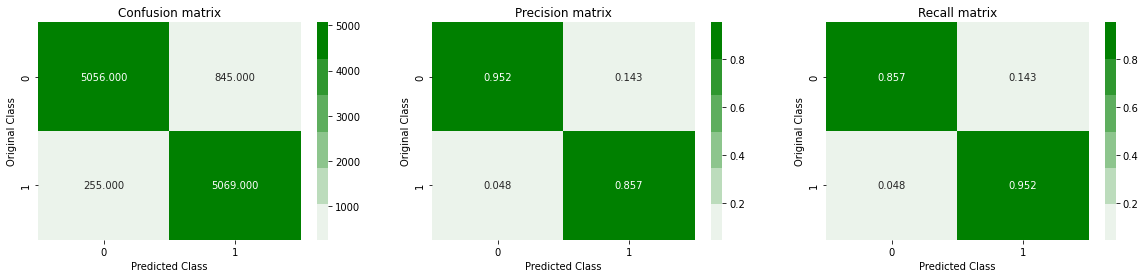

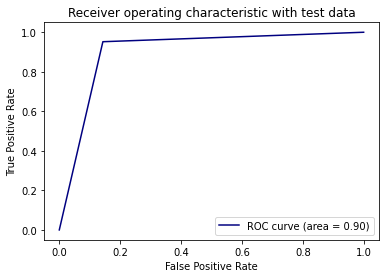




********** TF-IDF **********
{'priors': None, 'var_smoothing': 1e-09}
Accuracy:  0.938619153674833
Error:  0.2498998613736471


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5901
           1       0.93      0.95      0.94      5324

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225

********** LOG-LOSS **********
log loss on train dataset :  1.871390475122805
log loss on test dataset :  1.9543124531080704


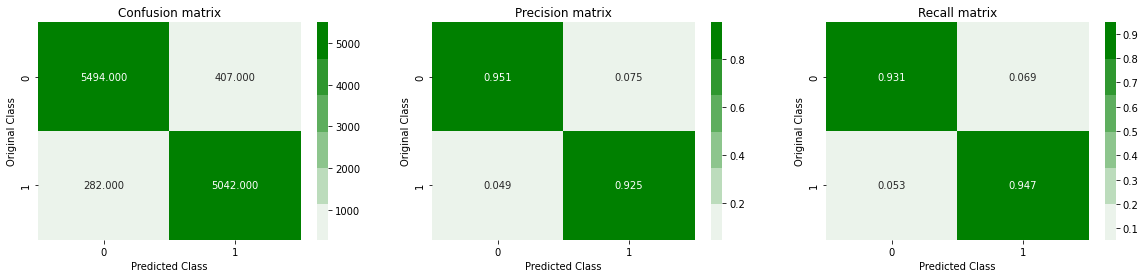

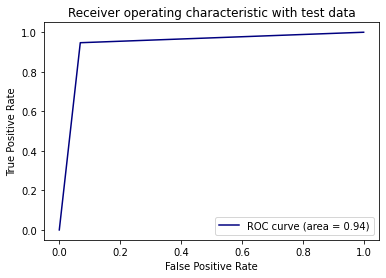




********** DOC2VEC **********
{'priors': None, 'var_smoothing': 1e-09}
Accuracy:  0.9317594654788419
Error:  0.2579613308287602


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5901
           1       0.93      0.93      0.93      5324

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225

********** LOG-LOSS **********
log loss on train dataset :  0.286801099810751
log loss on test dataset :  0.2934606762687052


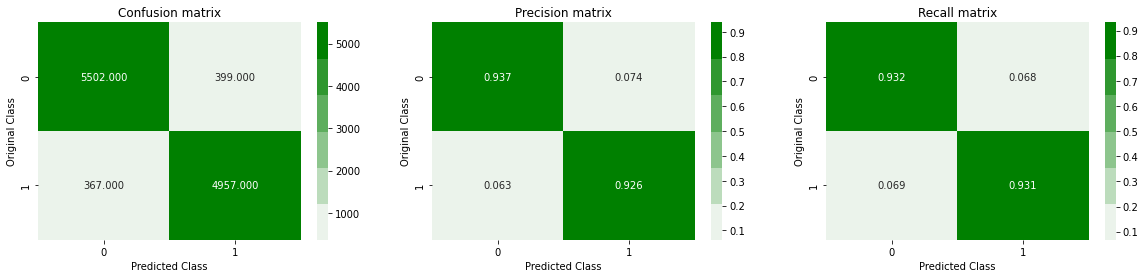

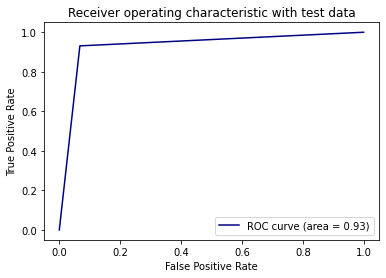

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = gaussian_naive_bayes(X_train_count_vec, y_train, X_test_count_vec, y_test,'Naive Bayes','BAG OF WORDS', 'No')
print("\n\n")

# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = gaussian_naive_bayes(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Naive Bayes','TF-IDF','No')
print("\n\n")

#For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = gaussian_naive_bayes(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Naive Bayes','DOC2VEC','No')


In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df3 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df3, ignore_index = True)
df3

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Naive Bayes,BAG OF WORDS,No,0.901381,0.304242
1,Naive Bayes,TF-IDF,No,0.937550,0.248470
2,Naive Bayes,DOC2VEC,No,0.926414,0.271597


### **Decision Tree without hyperparameter tuning**

In [ ]:
def decision_trees(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  data = []
  dec_tree = DecisionTreeClassifier()
  print(dec_tree.get_params())
  dec_tree.fit(x_train, Y_train)
  dec_tree_prediction = dec_tree.predict(x_test)
  Accuracy = accuracy_score(Y_test, dec_tree_prediction)
  print('Accuracy: ',Accuracy )

  err=-cross_val_score(dec_tree,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)
  print('\n')

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)

  print(classification_report(Y_test, dec_tree_prediction))

  pred = dec_tree.predict_proba(x_train)
  pred_t = dec_tree.predict_proba(x_test)
  print("*"*10,"LOG-LOSS","*"*10)
  print('log loss on train dataset : ', log_loss(Y_train, pred))
  print('log loss on test dataset : ', log_loss(Y_test, pred_t))
  print('\n\n')
  #plot confusion matrix
  plot_confusion_matrix(Y_test, dec_tree_prediction)
  print('\n\n')

  return data

********** BAG-OF-WORD **********
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy:  0.9933184855233853
Error:  0.09199615770203635


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5893
           1       0.99      0.99      0.99      5332

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

********** LOG-LOSS **********
log loss on train dataset :  9.992007221626413e-16
log loss on test dataset :  0.23077133448715473





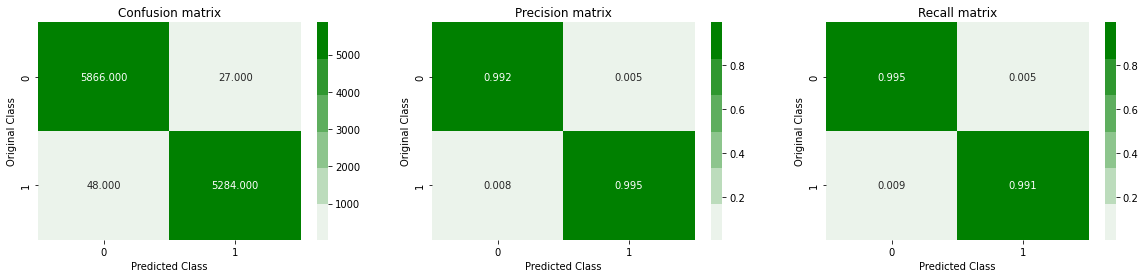







********** TF-IDF **********
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy:  0.9952783964365256
Error:  0.0929594900301529


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       0.99      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

********** LOG-LOSS **********
log loss on train dataset :  9.992007221626413e-16
log loss on test dataset :  0.16307840970425633





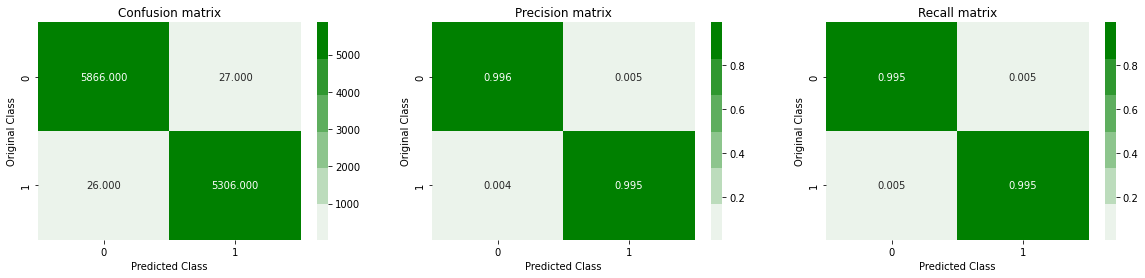







********** DOC2VEC **********
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy:  0.7830734966592428
Error:  0.4996230342944295


              precision    recall  f1-score   support

           0       0.79      0.80      0.79      5893
           1       0.77      0.77      0.77      5332

    accuracy                           0.78     11225
   macro avg       0.78      0.78      0.78     11225
weighted avg       0.78      0.78      0.78     11225

********** LOG-LOSS **********
log loss on train dataset :  9.992007221626413e-16
log loss on test dataset :  7.492375993016259





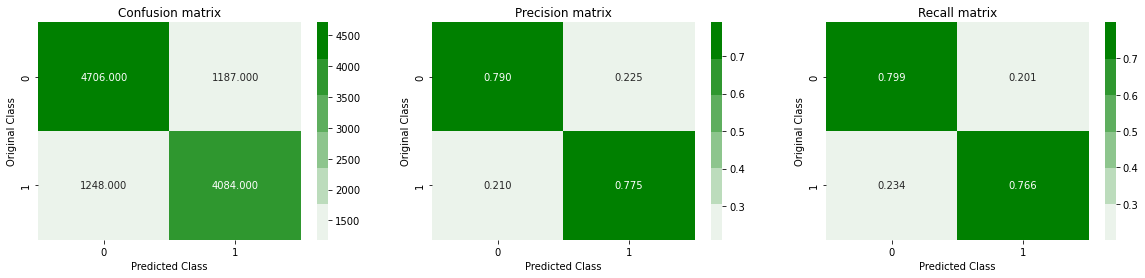

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = decision_trees(X_train_count_vec, y_train, X_test_count_vec, y_test,'Decision Tree','BAG OF WORDS', 'No')
print("\n\n")

# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = decision_trees(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Decision Tree','TF-IDF','No')
print("\n\n")

# For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = decision_trees(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Decision Tree','DOC2VEC','No')


In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df4 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df4, ignore_index = True)
df4

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Decision Tree,BAG OF WORDS,No,0.993318,0.091996
1,Decision Tree,TF-IDF,No,0.995278,0.092959
2,Decision Tree,DOC2VEC,No,0.783073,0.499623


### **Decision Tree with hyperparameter tuning**

In [ ]:
def bestparam_decision_trees(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  # initialise all hyperparameter which is need to be regularize
  data = []
  hyperparam = {'min_samples_leaf': [1,7], 'criterion': ['gini', 'entropy'], 'max_depth': [3,7,None]}
  gridsearch = GridSearchCV(DecisionTreeClassifier(), hyperparam, cv = 3, verbose = 3, return_train_score=True, n_jobs=-1)
  grid = gridsearch.fit(x_train, Y_train)

  #Getting best values of parameter 
  print('\n\n')
  print('Best parameters')
  print("gridsearch: ",grid.best_params_)
  print('\n\n')

  dec_trees = DecisionTreeClassifier(**grid.best_params_)
  dec_trees.fit(x_train, Y_train)

  sig_cal = CalibratedClassifierCV(dec_trees, method="sigmoid")
  sig_cal.fit(x_train, Y_train)

  predic_test = sig_cal.predict(x_test)
  Accuracy = accuracy_score(Y_test, predic_test)
  print('Accuracy: ', Accuracy)

  err=-cross_val_score(sig_cal,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)
  print('\n')

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)

  test_scores = grid.cv_results_['mean_test_score']
  train_scores = grid.cv_results_['mean_train_score'] 
 
  #plot graph for train and test score
  plt.plot(test_scores,color='blue', marker='o',label='test')
  plt.plot(train_scores,color='red', marker='o',label='train')
  plt.legend(loc='best')
  plt.show()
  
  dec_trees_predic_train = sig_cal.predict_proba(x_train)
  print("The train log loss is:",log_loss(Y_train, dec_trees_predic_train))
  dec_trees_predic_test = sig_cal.predict_proba(x_test)
  print("The test log loss is:",log_loss(Y_test, dec_trees_predic_test))
  print('\n\n')
  print(classification_report(Y_test, predic_test))
  print('\n\n')
  predicted_y =np.argmax(dec_trees_predic_test,axis=1)
  print("Total number of data points :", len(predicted_y))
  print('\n\n')
  
  # plot confusion matrix
  plot_confusion_matrix(Y_test, predic_test)

  print('\n\n')
  # plot roc curve
  from sklearn.metrics import roc_curve, auc
  fpr,tpr,ths = roc_curve(Y_test,predic_test)
  auc_sc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic with test data')
  plt.legend()
  plt.show()

  return data

********** BAG-OF-WORD **********
Fitting 3 folds for each of 12 candidates, totalling 36 fits



Best parameters
gridsearch:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}



Accuracy:  0.9942984409799555
Error:  0.07551077810555669




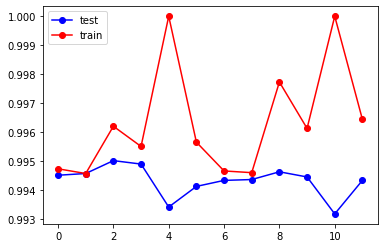

The train log loss is: 0.021422924621695198
The test log loss is: 0.029968178436323278



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5893
           1       0.99      1.00      0.99      5332

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225




Total number of data points : 11225





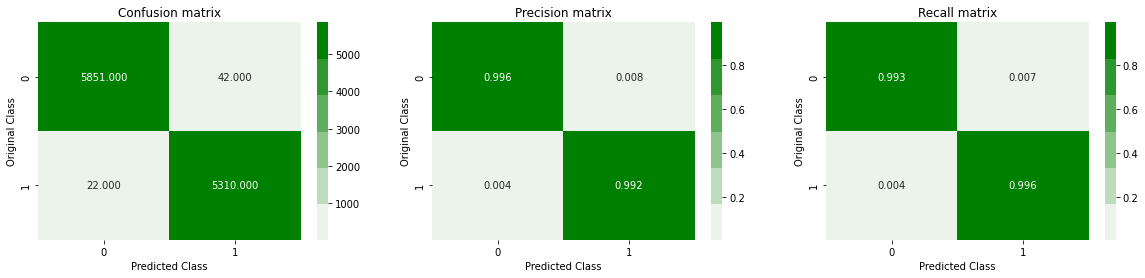

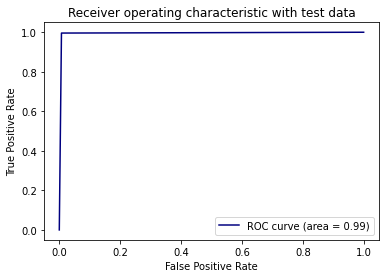

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = bestparam_decision_trees(X_train_count_vec, y_train, X_test_count_vec, y_test,'Decision Tree','BAG OF WORDS', 'Yes')
print("\n\n")



********** TF-IDF **********
Fitting 3 folds for each of 12 candidates, totalling 36 fits



Best parameters
gridsearch:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7}



Accuracy:  0.9951893095768374
Error:  0.08064354735456687




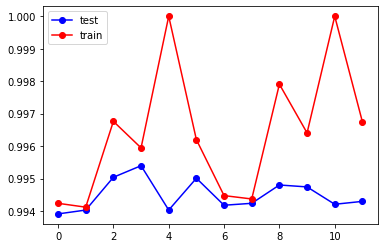

The train log loss is: 0.019812570552515396
The test log loss is: 0.02667662097733821



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5893
           1       0.99      1.00      0.99      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225




Total number of data points : 11225





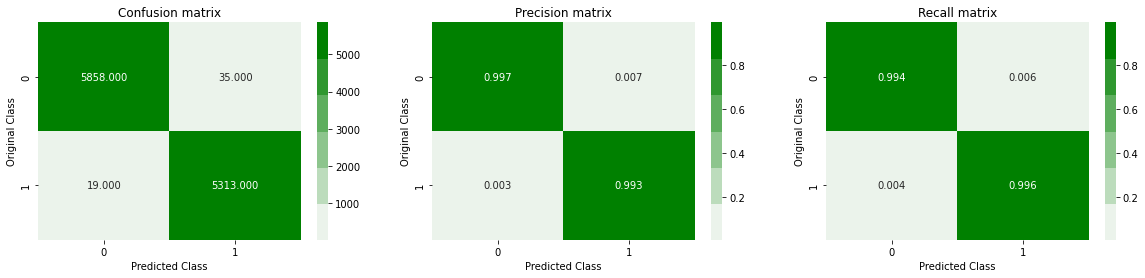

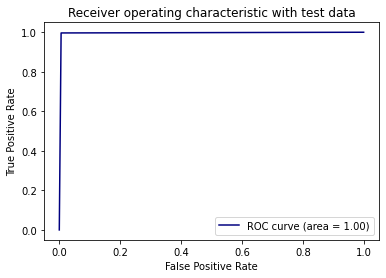

In [ ]:
# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = bestparam_decision_trees(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Decision Tree','TF-IDF','Yes')
print("\n\n")



********** DOC2VEC **********
Fitting 3 folds for each of 12 candidates, totalling 36 fits



Best parameters
gridsearch:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}



Accuracy:  0.8641425389755011
Error:  0.40520063115430865




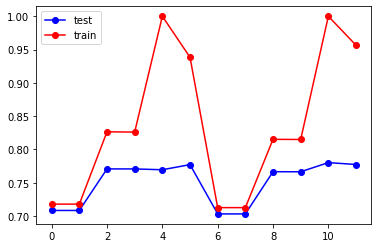

The train log loss is: 0.2781140279382926
The test log loss is: 0.4422283971157733



              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5893
           1       0.86      0.85      0.86      5332

    accuracy                           0.86     11225
   macro avg       0.86      0.86      0.86     11225
weighted avg       0.86      0.86      0.86     11225




Total number of data points : 11225





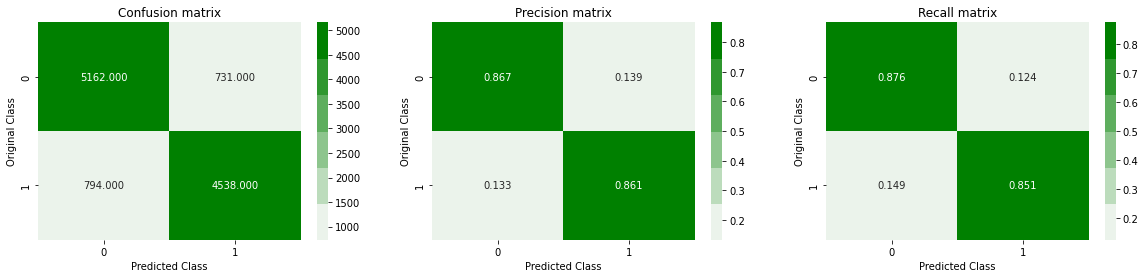

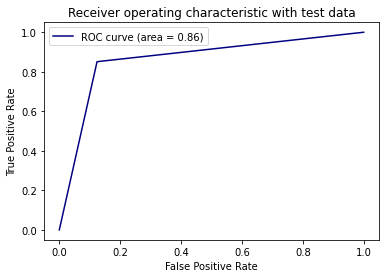

In [ ]:
# For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = bestparam_decision_trees(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Decision Tree','DOC2VEC','Yes')

In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df5 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df5, ignore_index = True)
df5

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Decision Tree,BAG OF WORDS,Yes,0.994298,0.075511
1,Decision Tree,TF-IDF,Yes,0.995189,0.080644
2,Decision Tree,DOC2VEC,Yes,0.864143,0.405201


### **Random forest without hyperparameter tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  data = []
  rand_for = RandomForestClassifier(random_state =1)
  print(rand_for.get_params())
  rand_for.fit(x_train, Y_train)
  rand_for_prediction = rand_for.predict(x_test)
  Accuracy = accuracy_score(Y_test, rand_for_prediction)
  print('Accuracy: ', Accuracy)

  err=-cross_val_score(rand_for,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)
  print('\n')

  print(classification_report(Y_test, rand_for_prediction))

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)


  pred = rand_for.predict_proba(x_train)
  pred_t = rand_for.predict_proba(x_test)
  print("*"*10,"LOG-LOSS","*"*10)
  print('log loss on train dataset : ', log_loss(Y_train, pred))
  print('log loss on test dataset : ', log_loss(Y_test, pred_t))
  print('\n\n')
  #plot confusion matrix
  plot_confusion_matrix(Y_test, rand_for_prediction)
  print('\n\n')

  return data

********** BAG-OF-WORD **********
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9967037861915368
Error:  0.06674146561849867


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       1.00      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

********** LOG-LOSS **********
log loss on train dataset :  0.02169620892496276
log loss on test dataset :  0.06426957249399205





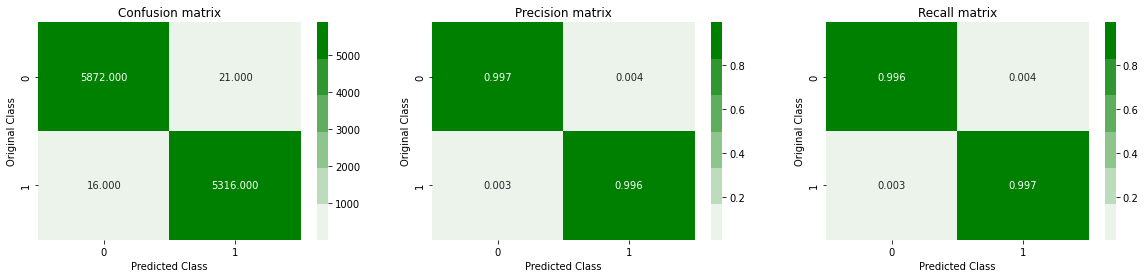







********** TF-IDF **********
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9967037861915368
Error:  0.06806260076526574


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       1.00      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

********** LOG-LOSS **********
log loss on train dataset :  0.02222748262246032
log loss on test dataset :  0.06431391214652017





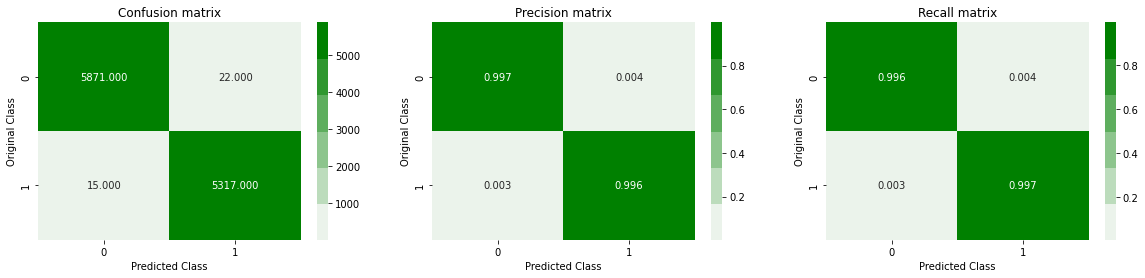







********** DOC2VEC **********
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9599109131403119
Error:  0.23368998649673092


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5893
           1       0.97      0.94      0.96      5332

    accuracy                           0.96     11225
   macro avg       0.96      0.96      0.96     11225
weighted avg       0.96      0.96      0.96     11225

********** LOG-LOSS **********
log loss on train dataset :  0.10560296511930613
log loss on test dataset :  0.3284693706456876





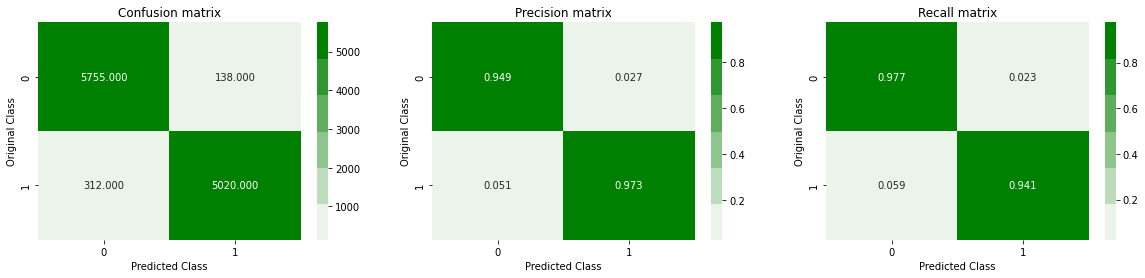

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = random_forest(X_train_count_vec, y_train, X_test_count_vec, y_test,'Random Forest','BAG OF WORDS', 'No')
print("\n\n")

# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = random_forest(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Random Forest','TF-IDF','No')
print("\n\n")

# For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = random_forest(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Random Forest','DOC2VEC','No')


In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df6 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df6, ignore_index = True)
df6

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Random Forest,BAG OF WORDS,No,0.996704,0.066741
1,Random Forest,TF-IDF,No,0.996704,0.068063
2,Random Forest,DOC2VEC,No,0.959911,0.233690


### **Random forest with hyperparameter tuning**

In [ ]:
def bestparam_random_forest(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  # initialise all hyperparameter which is need to be regularize
  # as we already find out hyperparam and now giving only those value which we already got so to reduce the time for execution when executing again.
  data = []
  hyperparam = {'n_estimators': [100,500], 'max_depth': [5,15,25], 
                'min_samples_split': [2,5],  'min_samples_leaf': [1, 3] }

  gridsearch = GridSearchCV(RandomForestClassifier(random_state =1), hyperparam, cv = 3, verbose = 3, return_train_score=True, n_jobs=-1)
  grid = gridsearch.fit(x_train, Y_train)

  #Getting best values of parameter 
  print('\n\n')
  print('Best parameters')
  print("gridsearch: ",grid.best_params_)
  print('\n\n')

  rand_for = RandomForestClassifier(**grid.best_params_, random_state=1)
  rand_for.fit(x_train, Y_train)

  sig_cal = CalibratedClassifierCV(rand_for, method="sigmoid")
  sig_cal.fit(x_train, Y_train)

  predic_test = sig_cal.predict(x_test)
  Accuracy = accuracy_score(Y_test, predic_test)
  print('Accuracy: ', Accuracy)

  err=-cross_val_score(sig_cal,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)
  print('\n')

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)

  test_scores = grid.cv_results_['mean_test_score']
  train_scores = grid.cv_results_['mean_train_score'] 
 
  #plot graph for train and test score
  plt.plot(test_scores,color='blue', marker='o',label='test')
  plt.plot(train_scores,color='red', marker='o',label='train')
  plt.legend(loc='best')
  plt.show()

  rand_for_predic_train = sig_cal.predict_proba(x_train)
  print("The train log loss is:",log_loss(Y_train, rand_for_predic_train))
  rand_for_predic_test = sig_cal.predict_proba(x_test)
  print("The test log loss is:",log_loss(Y_test, rand_for_predic_test))
  print('\n\n')
  print(classification_report(Y_test, predic_test))
  print('\n\n')
  predicted_y =np.argmax(rand_for_predic_test,axis=1)
  print("Total number of data points :", len(predicted_y))
  print('\n\n')
  #Plot Confusion matrix
  plot_confusion_matrix(Y_test, predic_test)

  print('\n\n')
  #plot roc curve
  from sklearn.metrics import roc_curve, auc
  fpr,tpr,ths = roc_curve(Y_test,predic_test)
  auc_sc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic with test data')
  plt.legend()
  plt.show()

  return data

********** BAG-OF-WORD **********
Fitting 3 folds for each of 24 candidates, totalling 72 fits



Best parameters
gridsearch:  {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}



Accuracy:  0.9967037861915368
Error:  0.06401497476408204




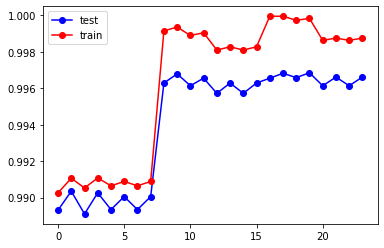

The train log loss is: 0.002022773577564962
The test log loss is: 0.012529897276087996



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       1.00      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225




Total number of data points : 11225





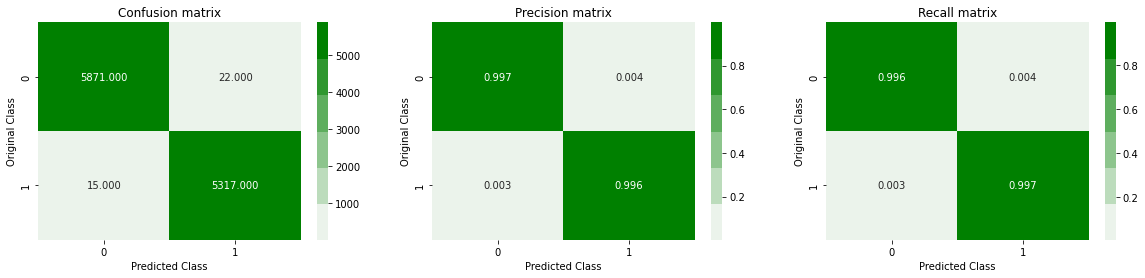

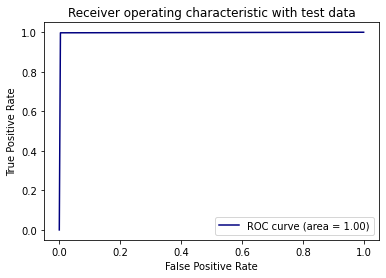

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = bestparam_random_forest(X_train_count_vec, y_train, X_test_count_vec, y_test,'Random Forest','BAG OF WORDS', 'Yes')
print("\n\n")



********** TF-IDF **********
Fitting 3 folds for each of 24 candidates, totalling 72 fits



Best parameters
gridsearch:  {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}



Accuracy:  0.9964365256124722
Error:  0.06470675535876773




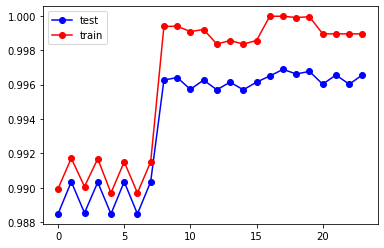

The train log loss is: 0.0014990668816479355
The test log loss is: 0.012586611806834217



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       1.00      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225




Total number of data points : 11225





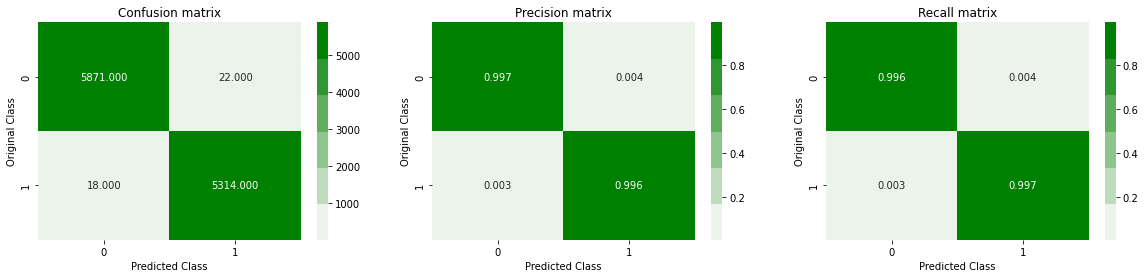

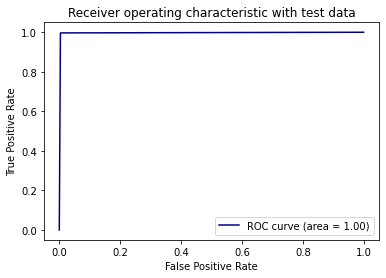

In [ ]:
# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = bestparam_random_forest(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Random Forest','TF-IDF','Yes')
print("\n\n")


********** DOC2VEC **********
Fitting 3 folds for each of 24 candidates, totalling 72 fits



Best parameters
gridsearch:  {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}



Accuracy:  0.9716703786191537
Error:  0.18131071015773836




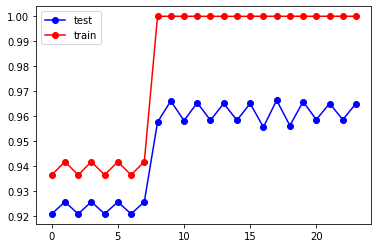

The train log loss is: 0.009770830709147332
The test log loss is: 0.07889410749023734



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5893
           1       0.97      0.97      0.97      5332

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225




Total number of data points : 11225





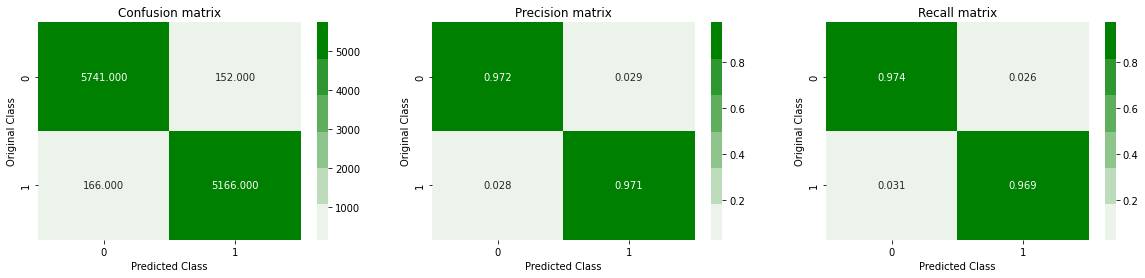

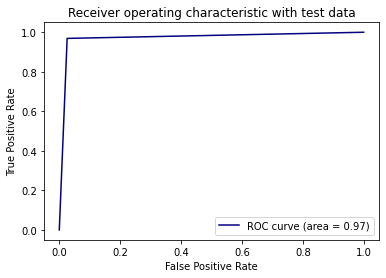

In [ ]:
# For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = bestparam_random_forest(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Random Forest','DOC2VEC','Yes')

In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df7 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df7, ignore_index = True)
df7

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Random Forest,BAG OF WORDS,Yes,0.996704,0.064015
1,Random Forest,TF-IDF,Yes,0.996437,0.064707
2,Random Forest,DOC2VEC,Yes,0.971670,0.181311


**XGBOOST**

In [ ]:
from xgboost import XGBClassifier

def xg_boost(x_train, Y_train, x_test, Y_test,model,technique,hyperparameter):
  data = []
  xg_boost = XGBClassifier()
  print(xg_boost.get_params())
  xg_boost.fit(x_train, Y_train)
  xg_boost_prediction = xg_boost.predict(x_test)

  Accuracy = accuracy_score(Y_test, xg_boost_prediction)
  print('Accuracy: ', Accuracy)

  err=-cross_val_score(xg_boost,x_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
  Error = np.sqrt(err)
  print('Error: ',Error)
  print('\n')

  data.append(model)
  data.append(technique)
  data.append(hyperparameter)
  data.append(Accuracy)
  data.append(Error)

  print(classification_report(Y_test, xg_boost_prediction))

  pred = xg_boost.predict_proba(x_train)
  pred_t = xg_boost.predict_proba(x_test)
  print("*"*10,"LOG-LOSS","*"*10)
  print('log loss on train dataset : ', log_loss(Y_train, pred))
  print('log loss on test dataset : ', log_loss(Y_test, pred_t))
  print('\n\n')
  #confusion matrix
  plot_confusion_matrix(Y_test, xg_boost_prediction)
  print('\n\n')

  return data

********** BAG-OF-WORD **********
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Accuracy:  0.9951002227171493
Error:  0.07249996421745766


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5893
           1       0.99      1.00      0.99      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

********** LOG-LOSS **********
log loss on train dataset :  0.010578234722542726
log loss on test dataset :  0.01811446951715136





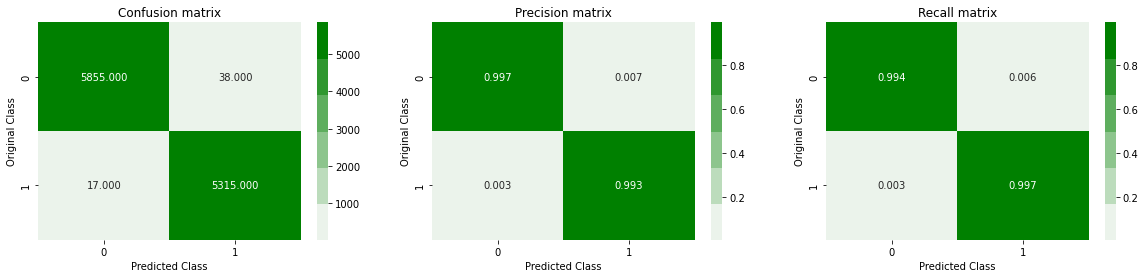







********** TF-IDF **********
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Accuracy:  0.9955456570155902
Error:  0.07126058557719331


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5893
           1       0.99      1.00      1.00      5332

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

********** LOG-LOSS **********
log loss on train dataset :  0.009576318114068052
log loss on test dataset :  0.018499968874035922





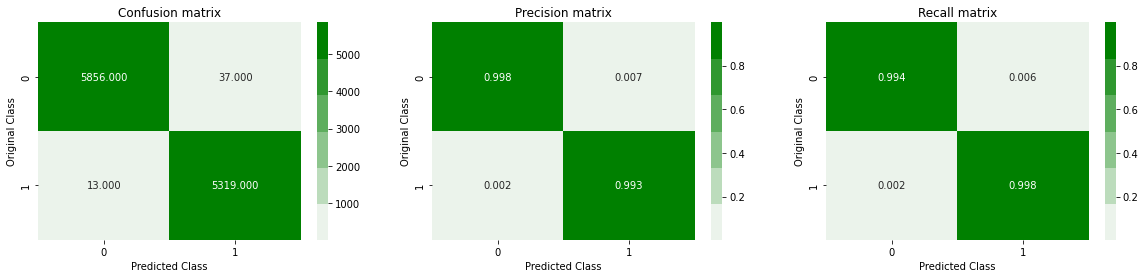







********** DOC2VEC **********
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Accuracy:  0.9475278396436526
Error:  0.23728551246003912


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5893
           1       0.95      0.94      0.94      5332

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

********** LOG-LOSS **********
log loss on train dataset :  0.20128541213794623
log loss on test dataset :  0.2263499192978133





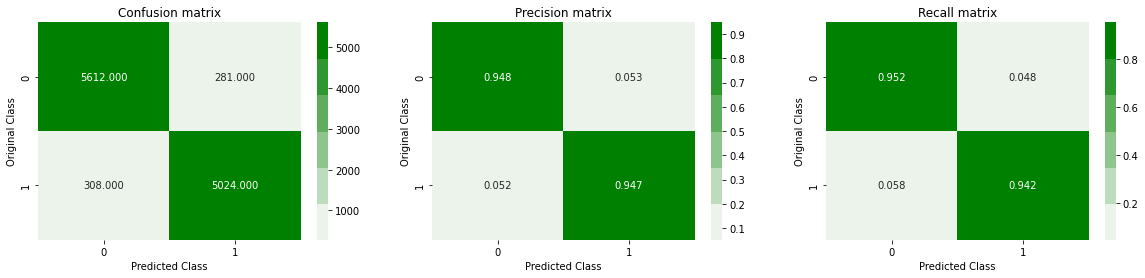

In [ ]:
# For countvectorizer
print("*"*10,"BAG-OF-WORD","*"*10)
BOW = xg_boost(X_train_count_vec, y_train, X_test_count_vec, y_test,'Xgboost','BAG OF WORDS', 'No')
print("\n\n")

# For tfidfvectorizer
print("*"*10,"TF-IDF","*"*10)
TF_IDF = xg_boost(X_train_tfidf_vec, y_train, X_test_tfidf_vec, y_test,'Xgboost','TF-IDF','No')
print("\n\n")

# For Doc2vec
print("*"*10,"DOC2VEC","*"*10)
DOC2VEC = xg_boost(X_train_dbow_vec, y_train, X_test_dbow_vec, y_test,'Xgboost','DOC2VEC','No')


In [ ]:
#storing result to dataframe
dt = [BOW,TF_IDF,DOC2VEC]
df8 = pd.DataFrame(dt,columns=['Model','Technique','Hyperparameter-Tuning','Accuracy','Error'])
summary_df = summary_df.append(df8, ignore_index = True)
df8

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Xgboost,BAG OF WORDS,No,0.995100,0.072500
1,Xgboost,TF-IDF,No,0.995546,0.071261
2,Xgboost,DOC2VEC,No,0.947528,0.237286


In [ ]:
summary_df

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Logestic Regression,BAG OF WORDS,No,0.994120,0.088034
1,Logestic Regression,TF-IDF,No,0.985835,0.143141
2,Logestic Regression,DOC2VEC,No,0.991091,0.100776
3,Logestic Regression,BAG OF WORDS,Yes,0.993942,0.089540
4,Logestic Regression,TF-IDF,Yes,0.990379,0.118263
5,Logestic Regression,DOC2VEC,Yes,0.991448,0.104253
6,Naive Bayes,BAG OF WORDS,No,0.901381,0.304242
7,Naive Bayes,TF-IDF,No,0.937550,0.248470
8,Naive Bayes,DOC2VEC,No,0.926414,0.271597
9,Decision Tree,BAG OF WORDS,No,0.993318,0.091996


In [ ]:
summary_df.to_pickle('/content/drive/MyDrive/Fake News/pickels/summary_model')

In [ ]:
summary_df = pd.read_pickle("/content/drive/MyDrive/Fake News/pickels/summary_model")
summary_df

,Model,Technique,Hyperparameter-Tuning,Accuracy,Error
0,Logestic Regression,BAG OF WORDS,No,0.994120,0.088034
1,Logestic Regression,TF-IDF,No,0.985835,0.143141
2,Logestic Regression,DOC2VEC,No,0.991091,0.100776
3,Logestic Regression,BAG OF WORDS,Yes,0.993942,0.089540
4,Logestic Regression,TF-IDF,Yes,0.990379,0.118263
5,Logestic Regression,DOC2VEC,Yes,0.991448,0.104253
6,Naive Bayes,BAG OF WORDS,No,0.901381,0.304242
7,Naive Bayes,TF-IDF,No,0.937550,0.248470
8,Naive Bayes,DOC2VEC,No,0.926414,0.271597
9,Decision Tree,BAG OF WORDS,No,0.993318,0.091996


### **Summarizing all models**

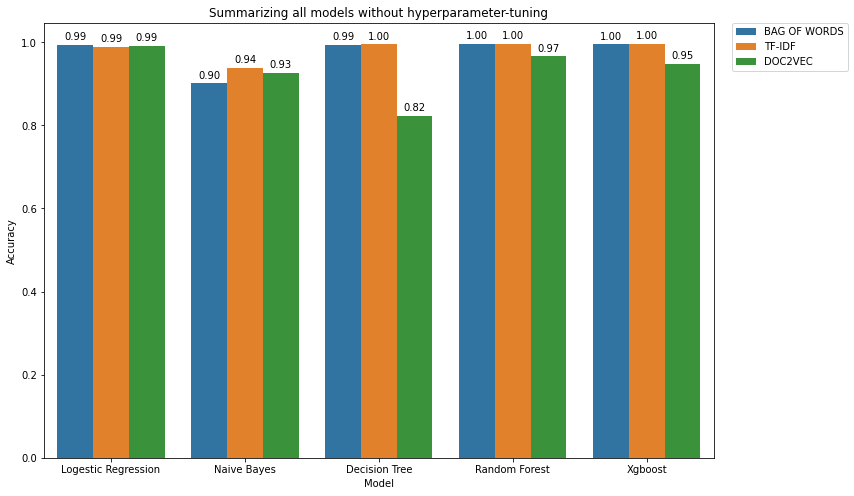

In [ ]:
#Models without Hyperparameter-tuning
plt.figure(figsize=(12,8))
import seaborn as sns
plots = sns.barplot(x = summary_df["Model"],
            y = summary_df["Accuracy"],
            hue = summary_df["Technique"],
            data = summary_df[summary_df["Hyperparameter-Tuning"] == 'No'],
            ci = 0)
for bar in plots.patches:
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.title("Summarizing all models without hyperparameter-tuning")
plt.xlabel("Model")
plt.ylabel("Accuracy")
# Show the plot
plt.show()

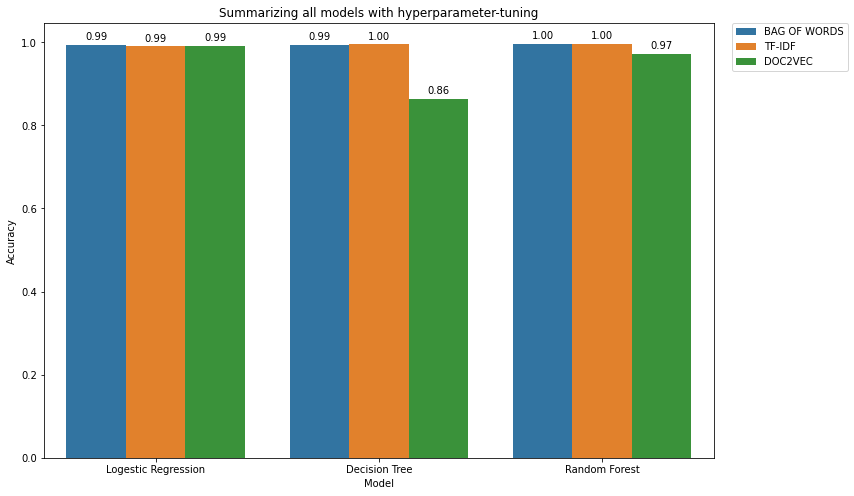

In [ ]:
#Models with Hyperparameter-tuning
plt.figure(figsize=(12,8))
import seaborn as sns
plots = sns.barplot(x = summary_df[summary_df["Hyperparameter-Tuning"] == "Yes"].Model,
            y = summary_df["Accuracy"],
            hue = summary_df["Technique"],
            data = summary_df[summary_df["Hyperparameter-Tuning"] == "Yes"],
            ci = 0)
for bar in plots.patches:
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.title("Summarizing all models with hyperparameter-tuning")
plt.xlabel("Model")
plt.ylabel("Accuracy")
# Show the plot
plt.show()

In [ ]:
# import gzip
# import pickle

# # writing into file. This will take long time
# fp = gzip.open('/content/drive/MyDrive/Fake News/pickels/Countvectorizer.pkl','wb')
# pickle.dump(text_vectorizer,fp)
# fp.close()

# # read the file
# fp = gzip.open('/content/drive/MyDrive/Fake News/pickels/Countvectorizer.pkl','rb') #This assumes that tfidf.data is already packed with gzip
# count_vec = pickle.load(fp)
# fp.close()


In [ ]:
# pip install bz2file

In [ ]:
# import bz2file as bz2
# import pickle

# def compressed_pickle(title, data):
#   with bz2.BZ2File(title + '.pbz2', 'wb') as f:
#     pickle.dump(data, f)

# compressed_pickle('/content/drive/MyDrive/Fake News/pickels/count_vectorizer', text_vectorizer)

### **Final Model** - Logestic Regression(Bag of words)

In [14]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

# text_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=10, max_features=1000)
#this one is used in production
text_vectorizer = CountVectorizer(max_features=3000) 

#Train
X_train_count_vec = text_vectorizer.fit_transform(X_train).toarray()
print("Train count vectorizer: ",X_train_count_vec.shape) 


#Test
X_test_count_vec=text_vectorizer.transform(X_test).toarray()
print("Test count vectorizer: ",X_test_count_vec.shape) 

Train count vectorizer:  (33673, 3000)
Test count vectorizer:  (11225, 3000)


Accuracy:  0.995902004454343
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5901
           1       1.00      0.99      1.00      5324

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



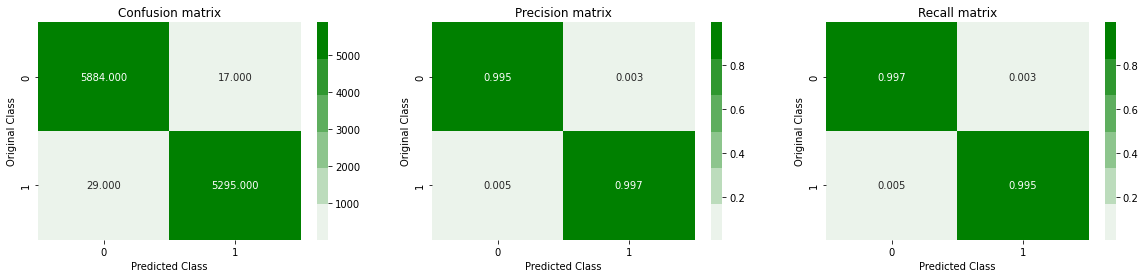

In [16]:
#using text_vectorizer = CountVectorizer(max_features=3000)
log_reg = LogisticRegression(max_iter = 300)
log_reg.fit(X_train_count_vec, y_train)
log_reg_prediction = log_reg.predict(X_test_count_vec)
Accuracy = accuracy_score(y_test, log_reg_prediction)
print('Accuracy: ', Accuracy)

print(classification_report(y_test, log_reg_prediction))

#plot confusion matrix
plot_confusion_matrix(y_test, log_reg_prediction)

In [17]:
#saving vectorizer
#using text_vectorizer = CountVectorizer(max_features=3000)
import pickle
filename = '/content/drive/MyDrive/Fake News/pickels/CountVectorizer.pkl'
pickle.dump(text_vectorizer, open(filename, 'wb' ))

In [18]:
#saving model
import pickle
filename = '/content/drive/MyDrive/Fake News/pickels/Logistic_model.pkl'
pickle.dump(log_reg, open(filename, 'wb' ))

In [19]:

# Load the model from the file
log = pickle.load(open("/content/drive/MyDrive/Fake News/pickels/Logistic_model.pkl", 'rb'))
#using text_vectorizer = CountVectorizer(max_features=3000)
# Use the loaded model to make predictions
logist_pred = log.predict(X_test_count_vec)

Accuracy = accuracy_score(y_test, logist_pred)
print('Accuracy: ', Accuracy)

Accuracy:  0.995902004454343


### **BERT Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# libraries
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# !pip install tensorflow_text
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

     |████████████████████████████████| 4.9 MB 4.3 MB/s 
     |████████████████████████████████| 462 kB 48.2 MB/s 


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Fake News/News.csv")
data.head()

,Unnamed: 0,title,text,subject,date,Labels
0,0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,politics,"Sep 22, 2016",Fake
1,1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Government News,"Jun 26, 2015",Fake
2,2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",Fake
3,3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,left-news,"Nov 25, 2015",Fake
4,4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,politics,"Dec 21, 2016",Fake


In [ ]:
data['Combined_text'] = data['title'] +' '+ data['text']

In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.drop(["text"],axis=1,inplace=True)
data.drop(["date"],axis=1,inplace=True)
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,subject,Labels,Combined_text
0,politics,Fake,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...
1,Government News,Fake,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...
2,politics,Fake,BLACK LIVES MATTER TERRORISTS May Be Shut Down...
3,left-news,Fake,EMBARRASSING: Obama Explains How He Will ‘Rebu...
4,politics,Fake,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...


In [ ]:
data.head()

,subject,Labels,Combined_text
0,politics,Fake,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...
1,Government News,Fake,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...
2,politics,Fake,BLACK LIVES MATTER TERRORISTS May Be Shut Down...
3,left-news,Fake,EMBARRASSING: Obama Explains How He Will ‘Rebu...
4,politics,Fake,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.25, random_state=0)

In [ ]:
test['Labels'].value_counts()

Fake    5873
True    5352
Name: Labels, dtype: int64

In [ ]:
test.to_csv('/content/drive/MyDrive/Fake News/pickels/test_bert_data.csv')
train.to_csv('/content/drive/MyDrive/Fake News/pickels/train_bert_data.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(data['Labels'])


data['Labels'] = labels

In [ ]:
data.head()

,subject,Labels,Combined_text
0,politics,0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...
1,Government News,0,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...
2,politics,0,BLACK LIVES MATTER TERRORISTS May Be Shut Down...
3,left-news,0,EMBARRASSING: Obama Explains How He Will ‘Rebu...
4,politics,0,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Combined_text, data.Labels, test_size=0.25, random_state=0)


In [ ]:
y_test.value_counts()

0    5873
1    5352
Name: Labels, dtype: int64

In [ ]:
X_train.head()

13637    ARMY THREATENS GREEN BERET WAR HERO WITH COURT...
42421    New Hampshire Senate race is tight despite Tru...
37916    Iraq opposed to U.S. recognition of Jerusalem ...
3321     Final sentencing reform bill near, says Senate...
2345      Fox News Rushes To ID Mosque Attacker As Moro...
Name: Combined_text, dtype: object

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):

    #confusion matrix
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    
    #Recall
    #divid each element of the confusion matrix with the sum of elements in that column
    A =(((C.T)/(C.sum(axis=1))).T)
    
    #Precision Matrix
    #divide each element of the confusion matrix with the sum of elements in that row
    B =(C/C.sum(axis=0))
    
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Build Model

In [ ]:
bert_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessed = bert_preprocess(bert_input)
bert_outputs = bert_encoder(preprocessed)

# Neural network layers
neural_layer = tf.keras.layers.Dropout(0.1, name="dropout")(bert_outputs['pooled_output'])
final_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(neural_layer)

#final
bert_model = tf.keras.Model(inputs=[bert_input], outputs = [final_layer])

print(bert_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

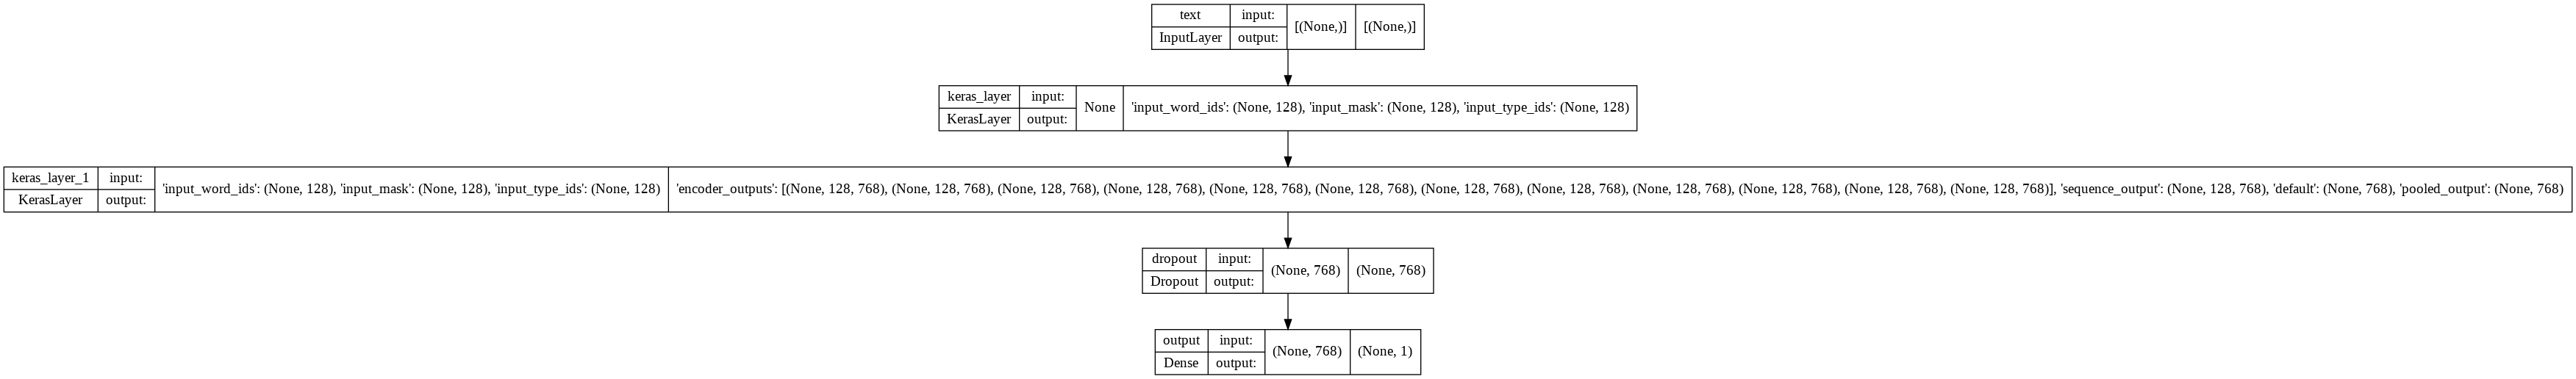

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(bert_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Training Model

In [ ]:
#compile model
bert_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=([
                        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
                      ]))

#model fit
bert_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1053/1053 [==============================] - 369s 338ms/step - loss: 0.3128 - accuracy: 0.8915 - precision: 0.8878 - recall: 0.8843
Epoch 2/10
1053/1053 [==============================] - 362s 343ms/step - loss: 0.1917 - accuracy: 0.9321 - precision: 0.9337 - recall: 0.9234
Epoch 3/10
1053/1053 [==============================] - 362s 344ms/step - loss: 0.1664 - accuracy: 0.9389 - precision: 0.9390 - recall: 0.9326
Epoch 4/10
1053/1053 [==============================] - 362s 344ms/step - loss: 0.1563 - accuracy: 0.9422 - precision: 0.9414 - recall: 0.9373
Epoch 5/10
1053/1053 [==============================] - 361s 343ms/step - loss: 0.1483 - accuracy: 0.9438 - precision: 0.9420 - recall: 0.9401
Epoch 6/10
1053/1053 [==============================] - 363s 345ms/step - loss: 0.1410 - accuracy: 0.9468 - precision: 0.9457 - recall: 0.9426
Epoch 7/10
1053/1053 [==============================] - 361s 343ms/step - loss: 0.1360 - accuracy: 0.9502 - precision: 0.9501 - recall: 0.9453

Evaluating Model

In [ ]:
# model evaluation 
test_acc = bert_model.evaluate(X_test, y_test)
train_acc = bert_model.evaluate(X_train, y_train)
print('\n\n')
print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

1053/1053 [==============================] - 362s 344ms/step - loss: 0.1006 - accuracy: 0.9658 - precision: 0.9659 - recall: 0.9623



Train accuracy:  [0.10060923546552658, 0.9657886028289795, 0.9658856391906738, 0.9622782468795776]
Test accuracy:  [0.09716803580522537, 0.9672160148620605, 0.966317355632782, 0.9648729562759399]


In [ ]:
#saving bert model
import pickle
filename = '/content/drive/MyDrive/Fake News/pickels/Bert_model.pkl'
pickle.dump(bert_model, open(filename, 'wb' ))

INFO:tensorflow:Assets written to: ram://230a2ef8-b890-4605-b9f3-9bb8a40e3ecd/assets


INFO:tensorflow:Assets written to: ram://230a2ef8-b890-4605-b9f3-9bb8a40e3ecd/assets


In [ ]:
import pickle
from sklearn.metrics import accuracy_score
# Load the model from the file
bert_model = pickle.load(open("/content/drive/MyDrive/Fake News/pickels/Bert_model.pkl", 'rb'))


In [1]:
# import pickle
# from sklearn.metrics import accuracy_score
# # Load the model from the file
# bert = pickle.load(open("/content/drive/MyDrive/Fake News/pickels/Bert_model.pkl", 'rb'))

# # Use the loaded model to make predictions
# predicted_value = bert.predict(X_test).flatten()
# predicted_value = np.where(predicted_value > 0.5, 1, 0)

# Accuracy = accuracy_score(y_test, predicted_value)
# print('Accuracy: ', Accuracy)

In [ ]:
def predicting_value(x_test, bert_Model, Y_test):

  # getting predicted value
  predicted_value = bert_Model.predict(x_test).flatten()
  predicted_value = np.where(predicted_value > 0.5, 1, 0)

  print(classification_report(Y_test, predicted_value))

  #plot confusion matrix
  plot_confusion_matrix(Y_test, predicted_value)
  print('\n')


  #plot roc curve
  from sklearn.metrics import roc_curve, auc
  fpr,tpr,ths = roc_curve(Y_test,predicted_value)
  auc_sc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % auc_sc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic with test data')
  plt.legend()
  plt.show()



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5873
           1       0.97      0.96      0.97      5352

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



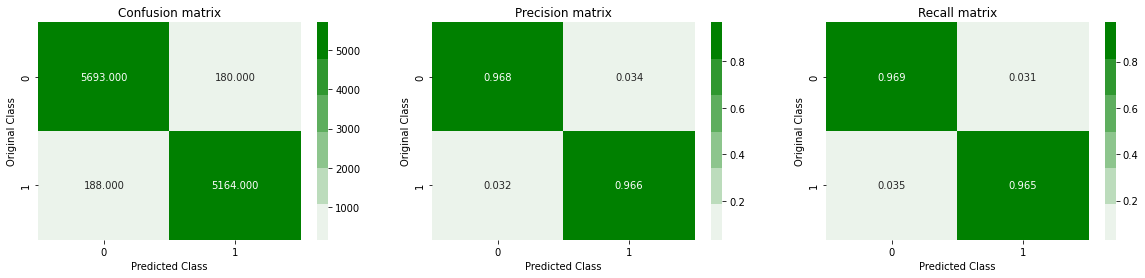

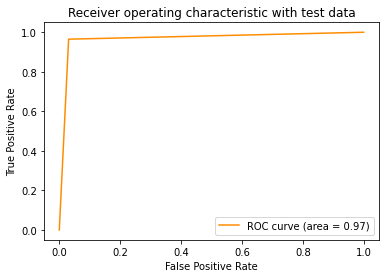

In [ ]:
predicting_value(X_test,bert_model,y_test)

## Merging multiple notebooks

In [1]:
# import json
# import os

# # note -- we can look at a .ipynb file as a plain text file right here in Jupyter notebook
# with open ('APredictFakeNews.ipynb', mode = 'r', encoding = 'utf-8') as f:
#     a = json.load (f)

# print(type(a))

# print(a.keys())

# #print(a)

<class 'dict'>
dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])


In [3]:
# # generate list of files to be merged
# notebooks_to_merge = [file for file in os.listdir(os.getcwd()) if file.endswith('.ipynb')]

# # list should be in the order in which you want the notebooks to be merged
# # my notebooks are labeled 1.ipynb, 2.ipynb... in the order I want
# notebooks_to_merge.sort()

# print(notebooks_to_merge)

['APredictFakeNews.ipynb', 'BModel.ipynb', 'CBert_Model.ipynb', 'Untitled.ipynb']


In [ ]:
# def combine_ipynb_files(list_of_notebooks, combined_file_name):
    
#     '''
#     parameters:
#     `list_of_notebooks` is an ordered list of your .ipynb files to be merged
#     `combined_file_name` is the name of your combined .ipynb file which will be generated by this function
    
#     returns: the filepath of the new file
#     '''
    
#     with open (notebooks_to_merge[0], mode = 'r', encoding = 'utf-8') as f:
#         a = json.load (f)
    
#     for notebook in notebooks_to_merge[1:]:
#         with open (notebook, mode = 'r', encoding = 'utf-8') as f:
#             b = json.load(f)
#             a['cells'].extend (b['cells']) 
#                 # extend here, not append, so that each dictionary in b['cells']
#                 # is added to new dictionary in a['cells']

#     with open(combined_file_name, mode='w', encoding='utf-8') as f:
#         json.dump(a, f)
    
#     print('Generated file: "{}".'.format(combined_file_name))
    
#     return (os.path.realpath(combined_file_name))


In [ ]:
# combine_ipynb_files(notebooks_to_merge, "combined_file.ipynb")